# **E-commerce Customer Churn**


#### **Outline**

- Business Problem
- Data Understanding
- Data Cleaning
- Data Analysis
- Data Preprocessing and Feature Engineering
- Modeling
- Conclusion and Recommendation

## Business Problem


**Latar Belakang**

Di era persaingan bisnis yang semakin ketat, menjaga pelanggan tetap setia menjadi kunci penting untuk mendukung keberlangsungan perusahaan. Peningkatan kecil dalam retensi pelanggan dapat memberikan dampak signifikan pada keuntungan perusahaan, karena pelanggan yang tetap menggunakan layanan dalam jangka waktu lama cenderung meningkatkan pengeluarannya. Selain itu, mempertahankan pelanggan yang sudah ada terbukti lebih hemat biaya dibandingkan dengan menarik pelanggan baru, yang memerlukan usaha dan sumber daya lebih besar.

Dalam industri E-commerce, salah satu tantangan utama adalah kehilangan pelanggan, atau yang dikenal sebagai customer churn. Fenomena ini dapat memberikan dampak besar karena membutuhkan upaya lebih untuk membuat pelanggan baru mencapai tingkat loyalitas yang sama dengan pelanggan lama. Oleh karena itu, penting bagi perusahaan untuk mengenali tanda-tanda pelanggan yang berpotensi berhenti agar dapat menyusun strategi yang tepat, mempertahankan hubungan dengan pelanggan, dan memaksimalkan efisiensi bisnis.

**Pernyataan Masalah**

Hilangnya pelanggan setia (*churn*) dapat memberikan dampak negatif yang signifikan bagi perusahaan jika tidak segera ditangani. Oleh karena itu, perusahaan perlu memastikan bahwa pelanggan setia tetap aktif menggunakan platform E-commerce. Salah satu pendekatan yang dapat dilakukan adalah melalui pemberian promosi. Namun, tanpa adanya strategi yang terarah, biaya dan sumber daya yang dikeluarkan untuk promosi dapat menjadi kurang efisien dan tidak memberikan hasil yang optimal.

**Tujuan**

Berdasarkan permasalahan yang telah diuraikan, perusahaan dapat mengambil langkah preventif dengan melakukan prediksi customer churn. Dengan memprediksi pelanggan yang berpotensi berhenti menggunakan layanan, strategi pemasaran dapat disusun secara lebih terarah dan tepat sasaran. Pendekatan ini tidak hanya membantu mengurangi biaya pemasaran, tetapi juga berpotensi meningkatkan profitabilitas dengan mempertahankan pelanggan setia.

Selain itu, identifikasi faktor-faktor yang memengaruhi customer churn dapat menjadi dasar yang kuat dalam mendukung pengambilan keputusan untuk menyusun strategi pemasaran yang lebih efektif dan efisien.

**Pendekatan Analitik**

Pendekatan analitik yang digunakan melibatkan pengembangan, evaluasi, dan implementasi model machine learning klasifikasi untuk memprediksi kemungkinan pelanggan akan churn atau tetap bertahan, berdasarkan analisis data historis yang tersedia.

**Metrik Evaluasi**



|       | N-Pred| P-Pred |
| --- | --- | --- |
| **N-Act**     | TP | FP |
| **P-Act**      | FN | TP |

Target:

- 0: Pelanggan tidak *churn*
- 1: Pelanggan *churn*

Type 1 Error: False Positive 
- Konsekuensi: Mengeluarkan biaya untuk pelanggan yang sebenarnya tidak akan *churn*.

Type 2 Error: False Negative 
- Konsekuensi: Kehilangan pelanggan loyal yang sebenarnya berpotensi untuk *churn*.

Melihat konsekuensinya, pemilihan model harus berfokus pada upaya mengurangi risiko kehilangan pelanggan setia (Type 2 Error), sambil tetap mempertimbangkan efisiensi biaya pemasaran untuk pelanggan yang salah teridentifikasi (Type 1 Error). Oleh karena itu, diperlukan keseimbangan antara recall dan precision untuk kelas positif (*churn*).

Metrik evaluasi yang digunakan adalah ROC-AUC, karena metrik ini mampu mengevaluasi kemampuan model dalam membedakan antara pelanggan yang *churn* dan tidak *churn*, serta memberikan gambaran performa model secara keseluruhan. 

## **Data Understanding**

**Sumber Dataset**   
  
https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction  
  
**Penjelasan Dataset**

Dataset ini berasal dari sebuah perusahaan E-commerce terkemuka yang dirilis pada tahun 2020. Tujuan perusahaan dalam mengumpulkan dataset ini adalah untuk mengidentifikasi pelanggan yang berpotensi churn sehingga memungkinkan mereka untuk menyusun strategi promo yang lebih terarah. Dataset mencakup informasi tentang profil pelanggan dan riwayat transaksi, yang dapat digunakan untuk melakukan analisis mendalam terhadap pola perilaku pelanggan.


### Tools

In [244]:
# Library

import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.patches as mpatches
import matplotlib.colors

# FE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


# Saving Model
import pickle


In [245]:
# Load Dataset
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [246]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [247]:
df.shape

(3941, 11)

In [248]:
display(df.describe(), df.describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


| Attribute | Data Type | Description 
| --- | --- | --- |
| Tenure | Float | Customer tenure | 
| Warehouse to Home | Float | Distance from warehouse to customer's home | 
| Number of Device | Int | Number of registered devices | 
| Prefered Order Cat | Object | Customer's favorite category last month| 
| Satisfaction Score | Int |Customer satisfaction score | 
| Marital | Object | Customer's marital status | 
| Number of Address | Int | Number of registered addresses |   
| Complain | Int | 0 - No complaints, 1 - Has complaints |
| Day Since Last Order | Float | Days since last order | 
| Cashback Amount | Float | Average cashback last month | 
| Churn | Int | 0 - Not churned, 1 - Churned | 

Dari data yang tersedia dapat disimpulkan beberapa poin penting:

- Dataset memiliki 3941 baris dengan 11 kolom atribut.
- Variabel numerik kuantitatif dengan tipe data float adalah Tenure, Warehouse to Home, Day Since Last Order, dan Cashback Amount. Variabel numerik kuantitatif dengan tipe data int adalah Number of Device, Number of Address, dan Satisfaction Score.
- Variabel kategori kualitatif nominal terdiri dari Preferred Order Cat dan Marital. Sedangkan variabel kategori kualitatif ordinal adalah Satisfaction Score, yang menunjukkan urutan tingkat kepuasan pelanggan.
- Variabel biner seperti Complain dan Churn memiliki nilai 0 untuk "tidak ada" (misalnya, tidak ada komplain atau tidak churn) dan nilai 1 untuk "ada" (misalnya, ada komplain atau churn).
- Ditemukan adanya data yang hilang (missing values) pada beberapa atribut, sehingga memerlukan langkah-langkah data cleaning sebelum dilakukan analisis lebih lanjut.

## Data Cleaning

### Data Duplikat dan Typo
Langkah awal adalah mengidentifikasi data unik pada setiap fitur, sekaligus memeriksa keberadaan data duplikat atau kesalahan penulisan (typo) dalam dataset. 

In [249]:
# Data unik masing-masing fitur
listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].unique()]);

dfDesc = pd.DataFrame(columns=['dataFeatures','unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,unique,uniqueSample
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


Berdasarkan data di atas, tidak ditemukan adanya kesalahan penulisan (typo). Namun, pada fitur kategori yang disukai, terdapat dua kategori serupa, yaitu 'Mobile' dan 'Mobile Phone'. Oleh karena itu, semua entri dengan kategori 'Mobile' pada kolom tersebut akan diubah menjadi 'Mobile Phone'.

In [250]:
# Menghitung Jumlah per Kategori
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: count, dtype: int64

In [251]:
# Mengubah Mobile menjadi Mobile Phone
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1458
Mobile Phone          1446
Fashion                585
Grocery                273
Others                 179
Name: count, dtype: int64

Setelah penyesuaian kategori selesai, proses berikutnya adalah memeriksa keberadaan data duplikat. Karena dataset tidak menyertakan Customer ID, pemeriksaan dilakukan dengan mencari baris yang memiliki isi data yang identik di semua fitur.

In [252]:
# Melihat Jumlah Data Duplikat
Duplikat = df.duplicated().sum()
PersentaseDup = round((df.duplicated().sum()/df.shape[0])*100,2)
print (f'Data duplikat : {Duplikat}, Persentase Data Duplikat: {PersentaseDup}')

Data duplikat : 672, Persentase Data Duplikat: 17.05


Ditemukan sebanyak 672 baris duplikat dari total 3941 baris dalam dataset, yang setara dengan 17,05%. Karena dataset **tidak menyertakan Customer ID**, data tersebut dianggap sebagai duplikat sepenuhnya. Untuk menangani hal ini, baris duplikat akan dihapus, karena keberadaan data duplikat dapat berdampak negatif pada performa model machine learning. Selain itu, hasil evaluasi pada data uji juga berpotensi menjadi bias akibat information leakage dari data pelatihan  [(Reference)](https://deepchecks.com/what-is-data-cleaning/)

In [253]:
# Menghapus data duplikat
df.drop_duplicates(inplace=True)
print(f'shape data: {df.shape}, cek data duplikat: {df.duplicated().sum()}')

shape data: (3269, 11), cek data duplikat: 0


### Missing Value
Setelah proses pembersihan data duplikat selesai, tahap berikutnya adalah mengevaluasi dataset untuk memastikan tidak ada nilai yang kosong atau hilang (missing value).

In [254]:
# Melihat Missing Value masing-masing kolom
df.isna().sum()

Tenure                      159
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

In [255]:
# Kalkulasi missing value
print(f'''Jumlah missing value: {df.isnull().sum().sum()}
Jumlah baris dengan missing value: {df[df.isnull().any(axis=1)].shape[0]}
Persentase Baris dengan missing value: {round(df.isnull().sum().sum()/df.shape[0]*100,2)}%''')


Jumlah missing value: 475
Jumlah baris dengan missing value: 475
Persentase Baris dengan missing value: 14.53%


Persentase missing value yang ditemukan cukup besar, yaitu 14,53%, sehingga baris dengan nilai yang hilang tidak akan dihapus untuk mempertahankan jumlah data dan informasi yang tersedia. Semua nilai yang hilang berasal dari data numerik dengan tipe float dan sifat kontinu. Untuk analisis lebih lanjut, akan digunakan pustaka missingno guna memahami pola dan jenis data yang hilang. Identifikasi ini akan mempermudah proses pemilihan metode yang tepat untuk menangani missing value. Sumber: ([Identifying missingness with missingno.](https://digitaltesseract.com/data-imputation-techniques-an-introduction/))

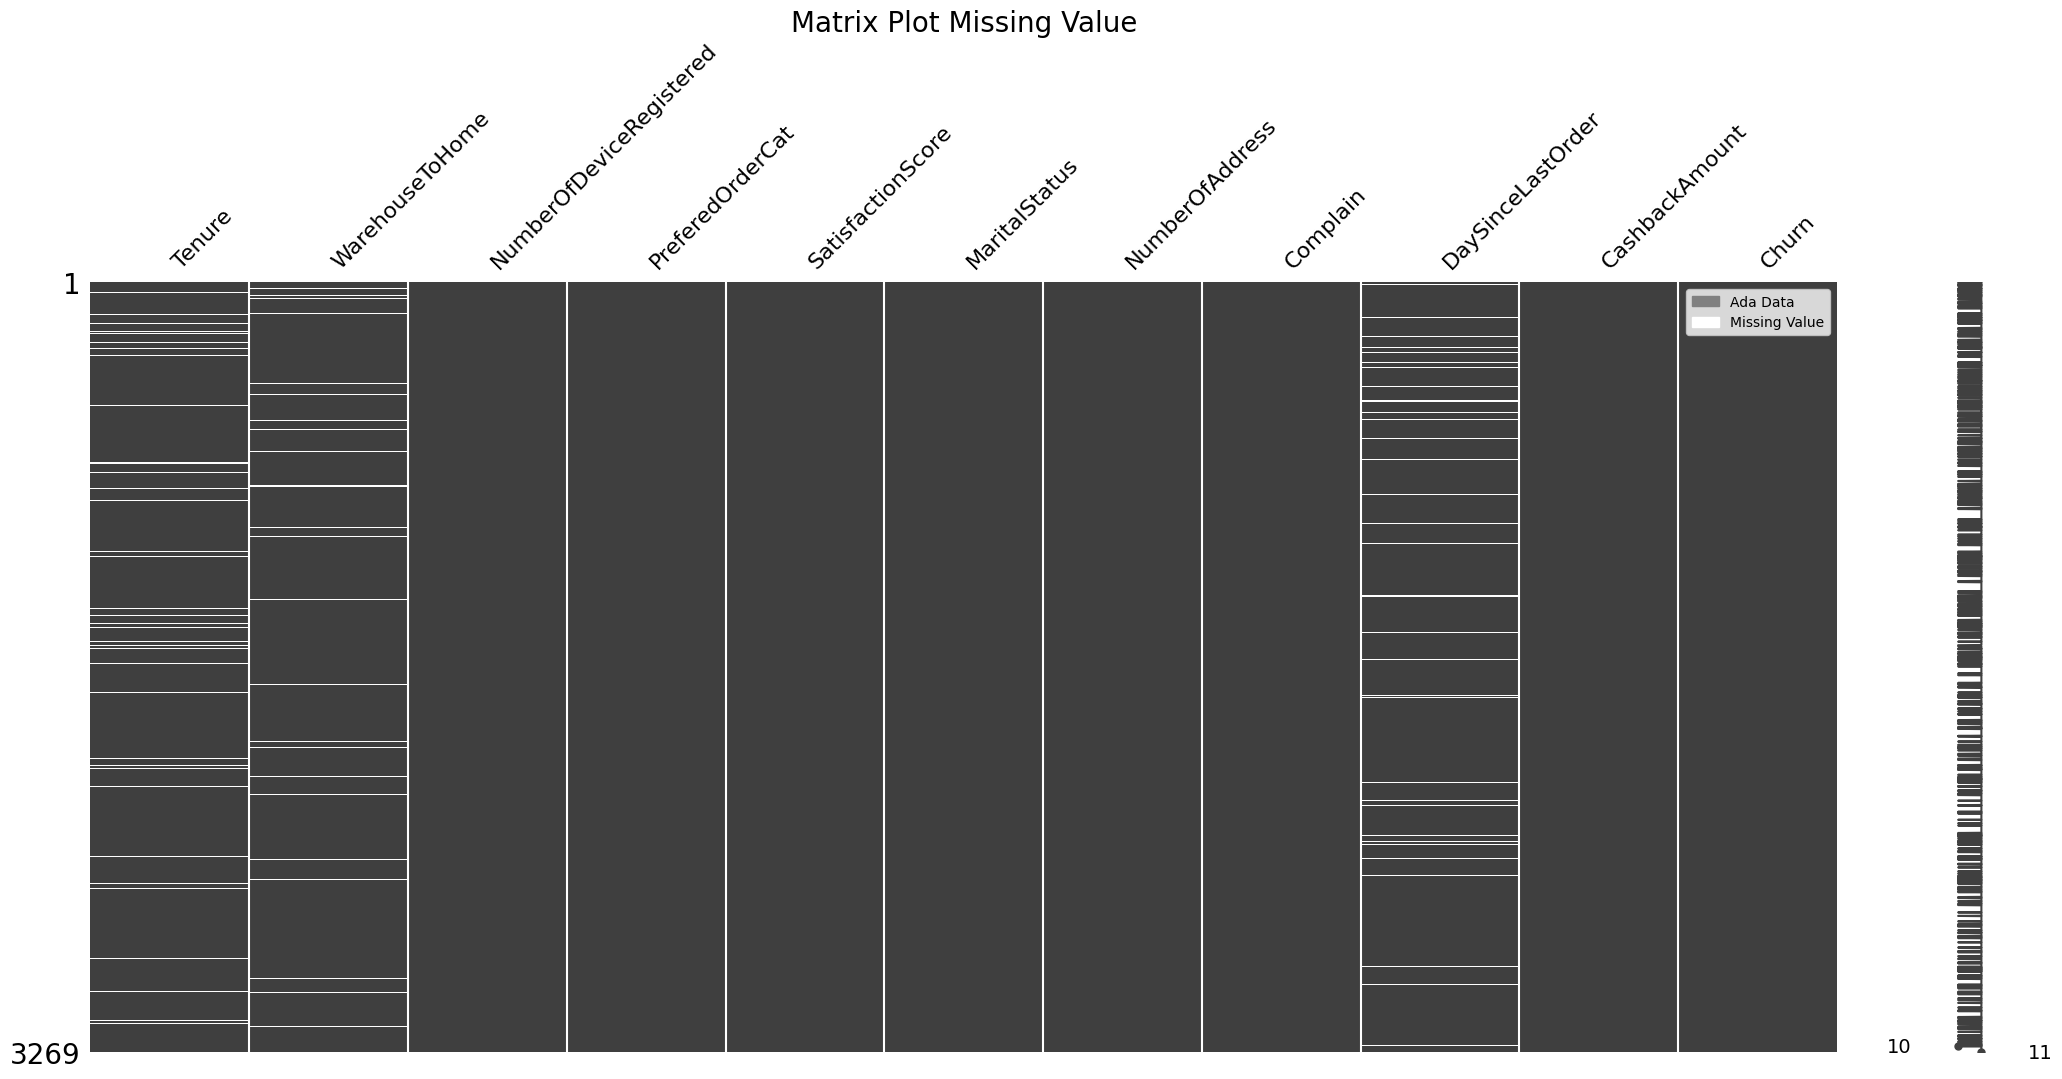

In [256]:
# Melihat missing value dengan matrix plot
msno.matrix(df)
gray_patch = mpatches.Patch(color='gray', label='Ada Data')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value', fontsize=20)
plt.show()


Dari hasil analisis, missing value tampak tidak mengikuti pola tertentu dan bersifat cukup acak. Di antara fitur yang ada, variabel yang dianggap memiliki pengaruh signifikan adalah SatisfactionScore dan CashbackAmount, karena keduanya berdampak langsung pada transaksi. Oleh karena itu, data akan disortir berdasarkan kedua variabel tersebut.

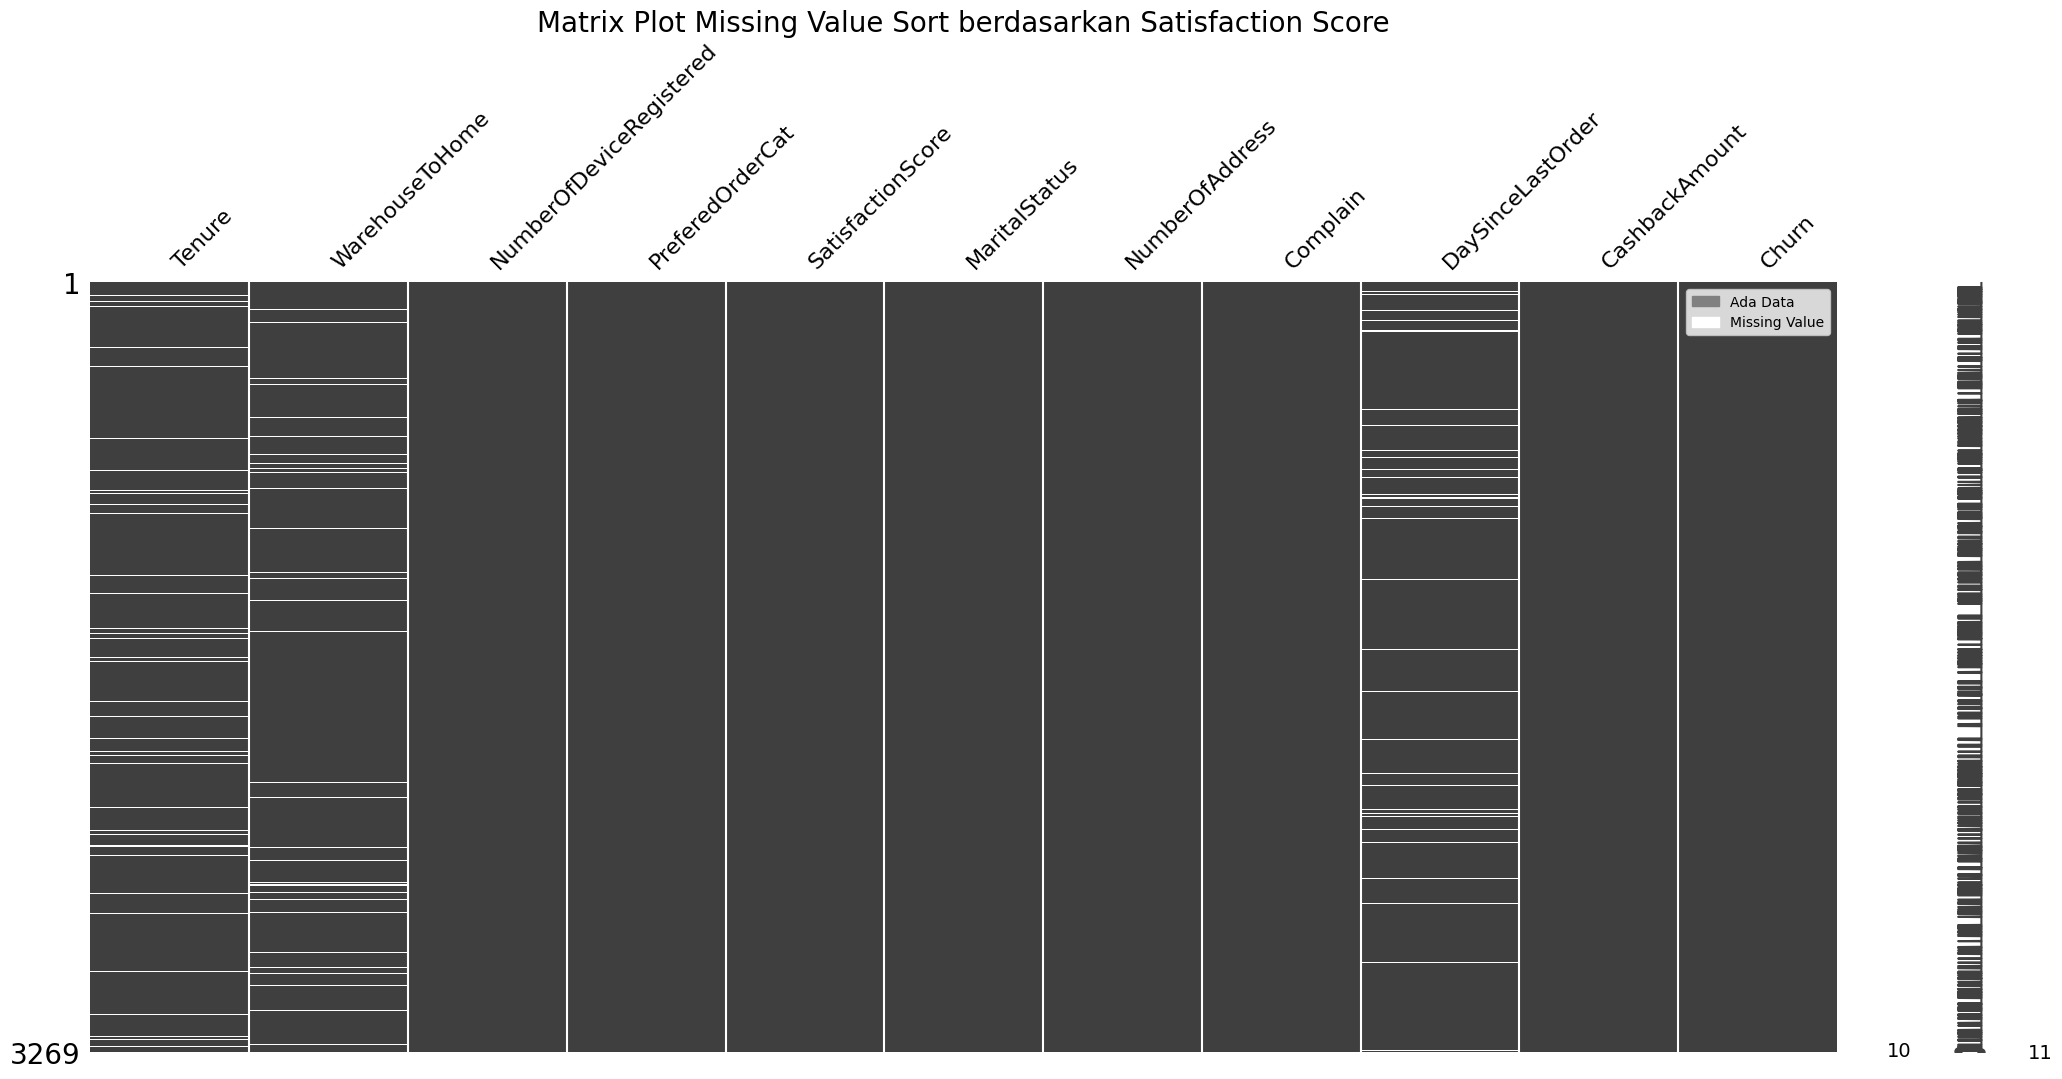

In [257]:
# Matrix missingness berdasarkan satisfaction score
msno.matrix(df.sort_values(by=['SatisfactionScore'], axis=0, ascending=True))
gray_patch = mpatches.Patch(color='gray', label='Ada Data')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value Sort berdasarkan Satisfaction Score', fontsize=20)
plt.show()

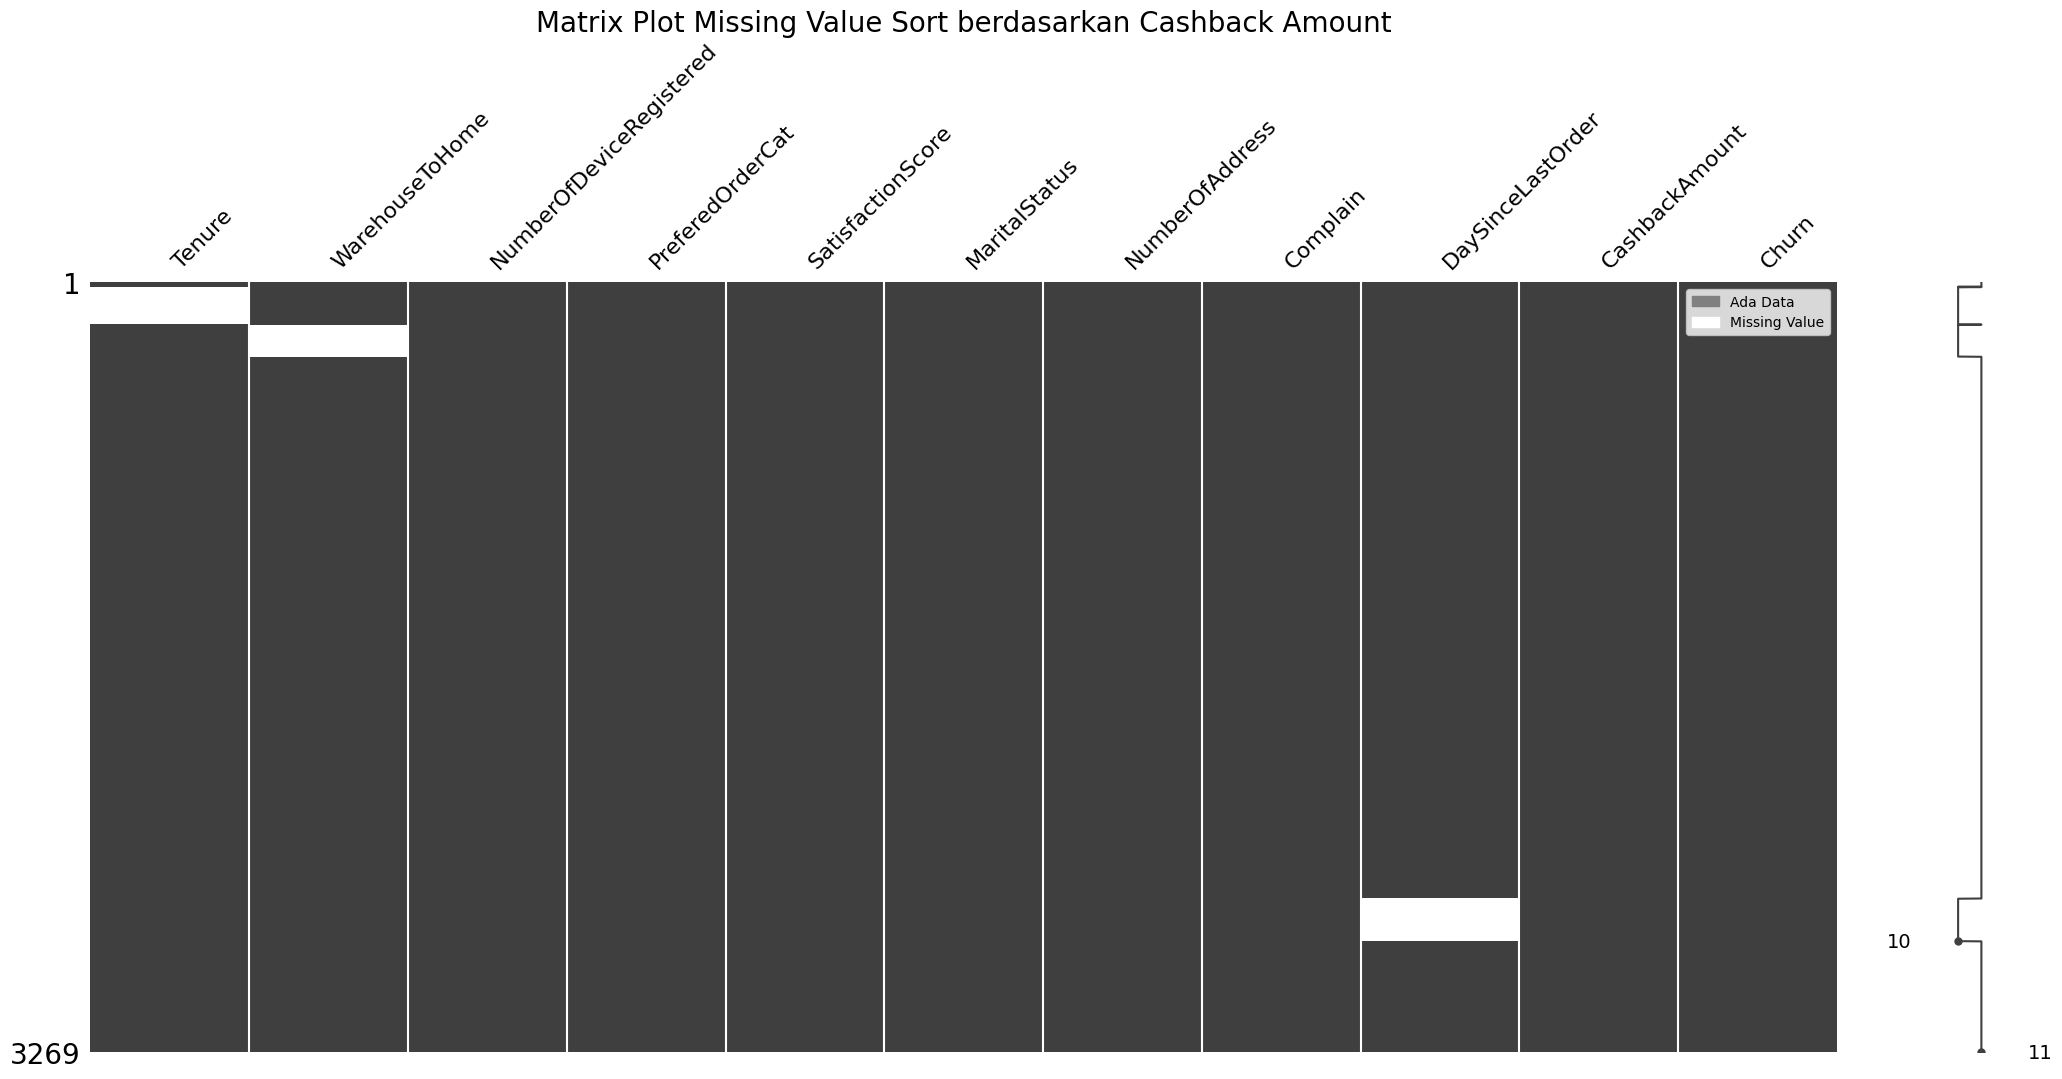

In [258]:
# Matrix missingness berdasarkan satisfaction score
msno.matrix(df.sort_values(by=['CashbackAmount'], axis=0, ascending=True))
gray_patch = mpatches.Patch(color='gray', label='Ada Data')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value Sort berdasarkan Cashback Amount', fontsize=20)
plt.show()

In [259]:
# Describe kolom missing value berdasarkan tenure
df[df['Tenure'].isna()].describe(include=['object','float','int'])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,0.0,159.000000,159.000000,159,159.000000,159,159.000000,159.000000,159.000000,159.000000,159.000000
unique,NaN,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,152,NaN,75,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.408805,3.238994,NaN,3.100629,NaN,3.201258,0.264151,2.150943,120.415535,0.295597
std,NaN,7.680498,0.822616,NaN,1.303331,NaN,2.425549,0.442273,2.413540,2.744332,0.457753
min,NaN,6.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,0.000000,112.000000,0.000000
25%,NaN,8.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,0.000000,120.280000,0.000000
50%,NaN,13.000000,3.000000,NaN,3.000000,NaN,2.000000,0.000000,2.000000,121.090000,0.000000
75%,NaN,19.000000,4.000000,NaN,4.000000,NaN,4.000000,1.000000,3.000000,122.180000,1.000000


In [260]:
# Describe kolom missing value berdasarkan WarehouseToHome
df[df['WarehouseToHome'].isna()].describe(include=['object','float','int'])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,135.000000,0.0,135.000000,135,135.000000,135,135.000000,135.000000,135.000000,135.000000,135.000000
unique,NaN,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,130,NaN,57,NaN,NaN,NaN,NaN,NaN
mean,6.059259,NaN,3.192593,NaN,3.014815,NaN,3.355556,0.303704,2.444444,124.609778,0.333333
std,7.308514,NaN,0.868145,NaN,1.450606,NaN,2.414096,0.461569,2.610732,1.008970,0.473160
min,0.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,0.000000,0.000000,123.180000,0.000000
25%,0.000000,NaN,3.000000,NaN,2.000000,NaN,2.000000,0.000000,0.000000,123.720000,0.000000
50%,3.000000,NaN,3.000000,NaN,3.000000,NaN,2.000000,0.000000,2.000000,124.500000,0.000000
75%,10.000000,NaN,4.000000,NaN,4.000000,NaN,5.000000,1.000000,3.000000,125.590000,1.000000


In [261]:
# Describe kolom missing value berdasarkan DaySinceLastOrder
df[df['DaySinceLastOrder'].isna()].describe(include=['object','float','int'])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,181.000000,181.000000,181.000000,181,181.000000,181,181.000000,181.000000,0.0,181.000000,181.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Fashion,NaN,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,138,NaN,102,NaN,NaN,NaN,NaN,NaN
mean,11.812155,15.718232,4.077348,NaN,2.883978,NaN,4.850829,0.259669,NaN,220.978232,0.165746
std,8.492354,8.251138,0.933682,NaN,1.434812,NaN,2.585185,0.439669,NaN,6.544886,0.372884
min,0.000000,6.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,NaN,209.340000,0.000000
25%,5.000000,9.000000,4.000000,NaN,1.000000,NaN,3.000000,0.000000,NaN,215.100000,0.000000
50%,10.000000,14.000000,4.000000,NaN,3.000000,NaN,4.000000,0.000000,NaN,221.370000,0.000000
75%,19.000000,19.000000,5.000000,NaN,4.000000,NaN,6.000000,1.000000,NaN,227.210000,0.000000


Berdasarkan matrix plot, terlihat bahwa missing value muncul secara acak secara umum (general pattern), namun memiliki hubungan dengan variabel **CashbackAmount**. Hal ini mengindikasikan tipe *Missing at Random* (MAR), di mana ada hubungan sistematis antara variabel yang memiliki nilai hilang dengan variabel lain, tetapi tidak dengan variabel yang mengalami kekosongan itu sendiri. Jika data terlihat acak namun menunjukkan hubungan dengan fitur lain setelah analisis lebih dalam, maka missing value tergolong MAR [(Sumber)](https://towardsdev.com/how-to-identify-missingness-types-with-missingno-61cfe0449ad9).

Dari analisis data diperoleh beberapa temuan:

- Baris dengan nilai kosong pada kolom Tenure memiliki rata-rata cashback dalam rentang 112,00 hingga 123,13.
- Baris dengan nilai kosong pada kolom WarehouseToHome memiliki rata-rata cashback dalam rentang 123,18 hingga 126,57.
- Baris dengan nilai kosong pada kolom DaySinceLastOrder memiliki rata-rata cashback dalam rentang 209,34 hingga 231,42.
- Baris dengan nilai kosong pada masing-masing fitur memiliki pola yang sama, di mana kategori status pernikahan (marital status) terbanyak adalah "Married."

Langkah berikutnya adalah menganalisis lebih lanjut untuk melihat apakah terdapat hubungan antara kolom MaritalStatus dengan kolom-kolom yang memiliki nilai hilang.

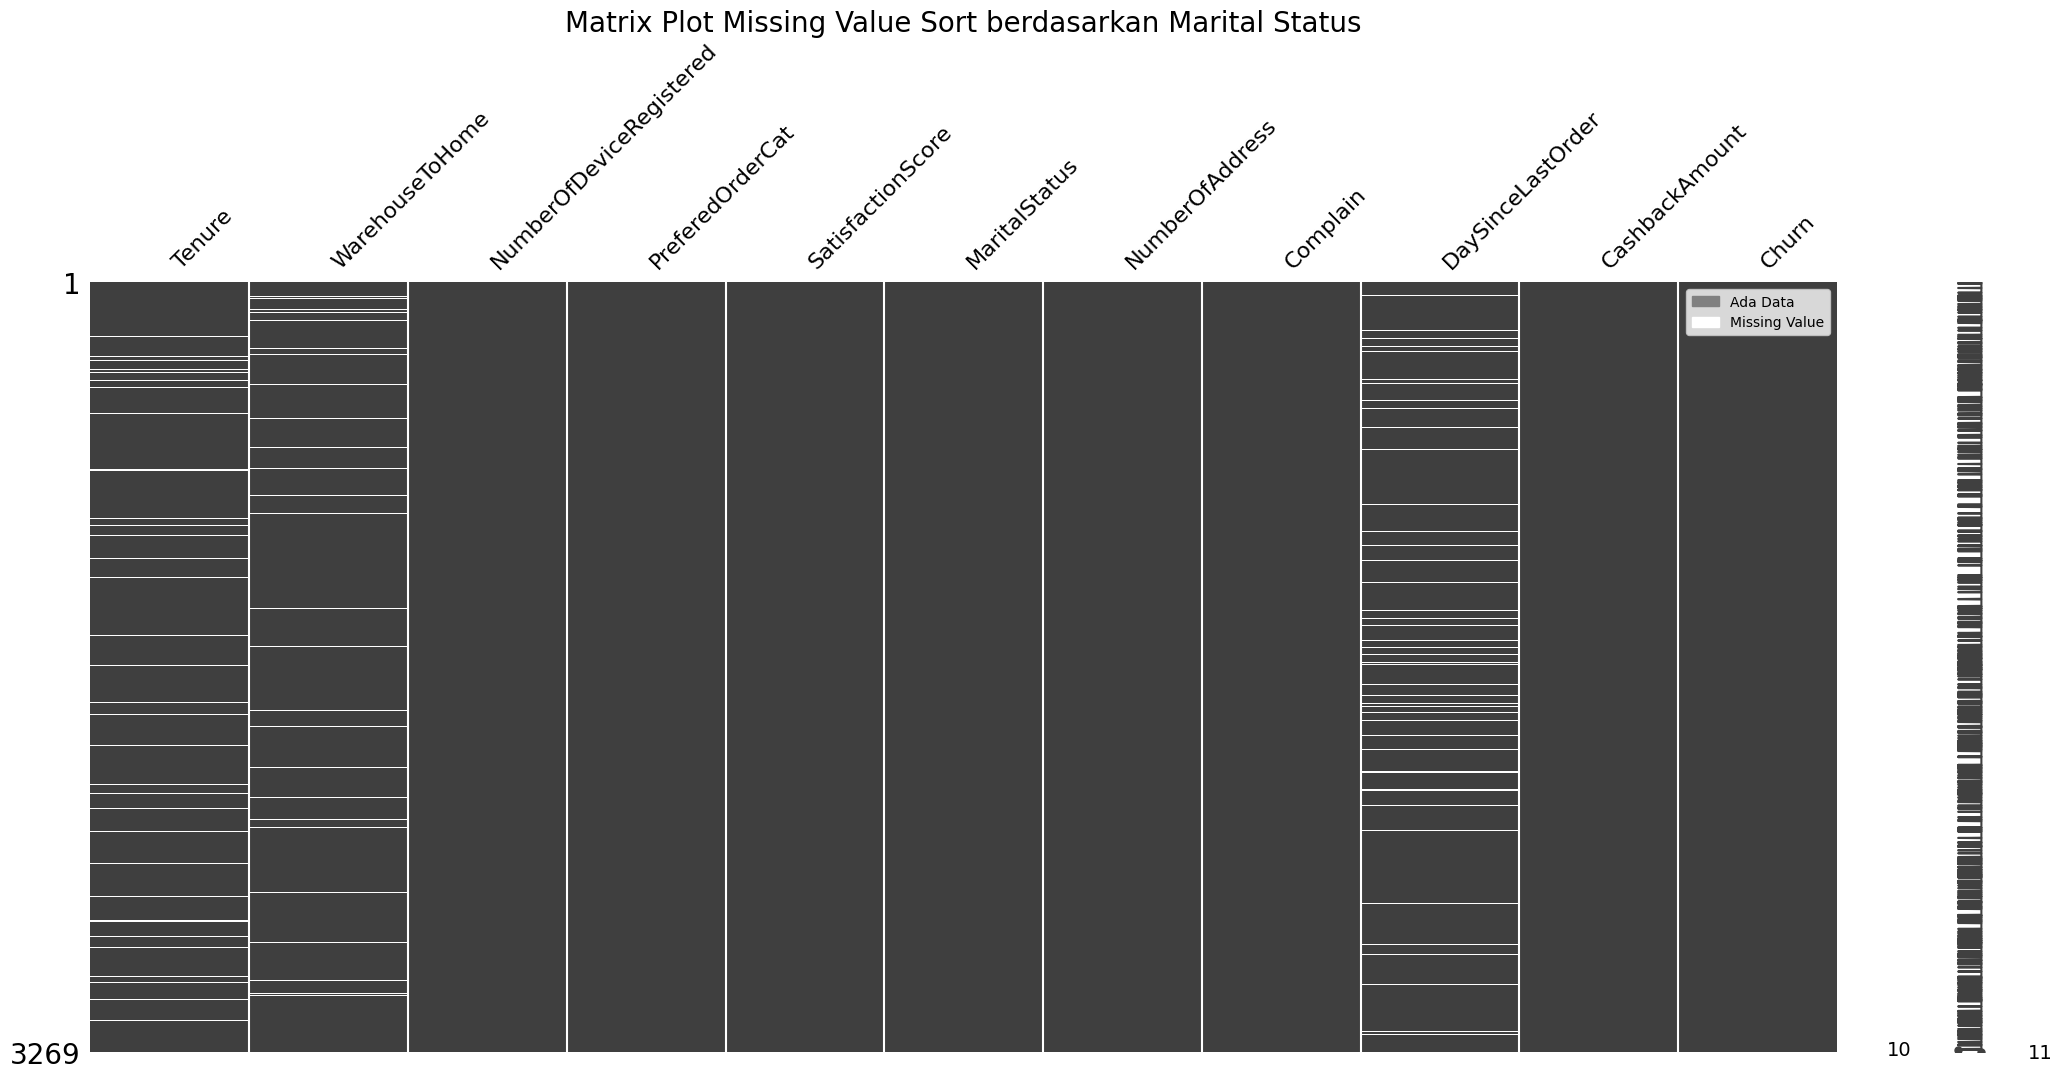

In [262]:
# Matrix missingness berdasarkan Marital Status
msno.matrix(df.sort_values(by=['MaritalStatus'], axis=0, ascending=True))
gray_patch = mpatches.Patch(color='gray', label='Ada Data')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value Sort berdasarkan Marital Status', fontsize=20)
plt.show()

In [263]:
# Melihat total data hilang dengan kategori Married pada Marital Status
(df[df['MaritalStatus']=='Married'].isna().sum()/df.isna().sum())*100

Tenure                      47.169811
WarehouseToHome             42.222222
NumberOfDeviceRegistered          NaN
PreferedOrderCat                  NaN
SatisfactionScore                 NaN
MaritalStatus                     NaN
NumberOfAddress                   NaN
Complain                          NaN
DaySinceLastOrder           56.353591
CashbackAmount                    NaN
Churn                             NaN
dtype: float64

In [264]:
print(f'''Jumlah data :\n {df['MaritalStatus'].value_counts()}
Persentase data: \n {df['MaritalStatus'].value_counts('Married')*100}''')

Jumlah data :
 MaritalStatus
Married     1686
Single      1007
Divorced     576
Name: count, dtype: int64
Persentase data: 
 MaritalStatus
Married     51.575405
Single      30.804527
Divorced    17.620067
Name: proportion, dtype: float64


Setelah dilakukan analisis lebih mendalam, matrix missingness berdasarkan Marital Status tidak menunjukkan adanya pola tertentu. Selain itu, kategori "Married" pada kolom Marital Status memang memiliki proporsi terbesar dalam dataset, sehingga dapat disimpulkan bahwa status pernikahan "Married" tidak memengaruhi hilangnya data.

Dari pengamatan ini, dapat disimpulkan bahwa missing value termasuk dalam kategori *Missing at Random* (MAR) dan memiliki keterkaitan dengan kolom **CashbackAmount**. Oleh karena itu, metode yang dipilih untuk menangani missing value adalah Iterative Imputation, karena dataset bersifat multivariat dan dipengaruhi oleh variabel lain. Penggunaan median tidak disarankan karena jumlah missing value yang cukup besar. Mengisi dengan median dapat menghasilkan bias pada total data yang dapat memengaruhi performa model ([Pemilihan Metode](https://digitaltesseract.com/data-imputation-techniques-an-introduction/)).

Sebelum melakukan imputasi, akan dilakukan percobaan untuk membandingkan distribusi kolom sebelum dan sesudah proses imputasi pada kolom **Tenure**, **WarehouseToHome**, dan **DaySinceLastOrder**. Hasil yang diharapkan adalah perbedaan distribusi yang minimal sehingga data tetap konsisten.

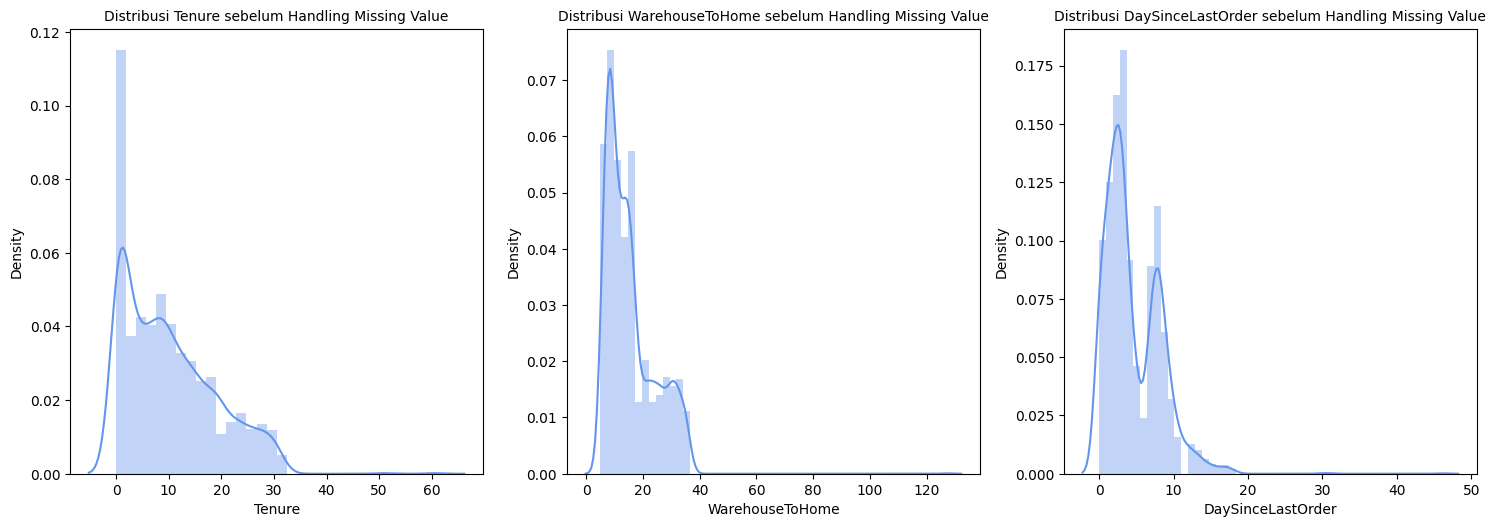

In [265]:
# Percobaan melihat distribusi imputasi dengan iterative imputer (Data sebelum handling missing value)
features = ['Tenure','WarehouseToHome', 'DaySinceLastOrder']
plt.figure(figsize=(15,15))

for i in range(0, len(features)):
  plt.subplot(3, 3, i+1)
  sns.distplot(df[features[i]], color='cornflowerblue')
  plt.tight_layout()
  plt.title(f'Distribusi {features[i]} sebelum Handling Missing Value', fontsize=10)

Text(0.5, 1.0, 'Distribusi Tenure, WarehouseToHome, dan DaySinceLastOrder setelah Handling Missing Value')

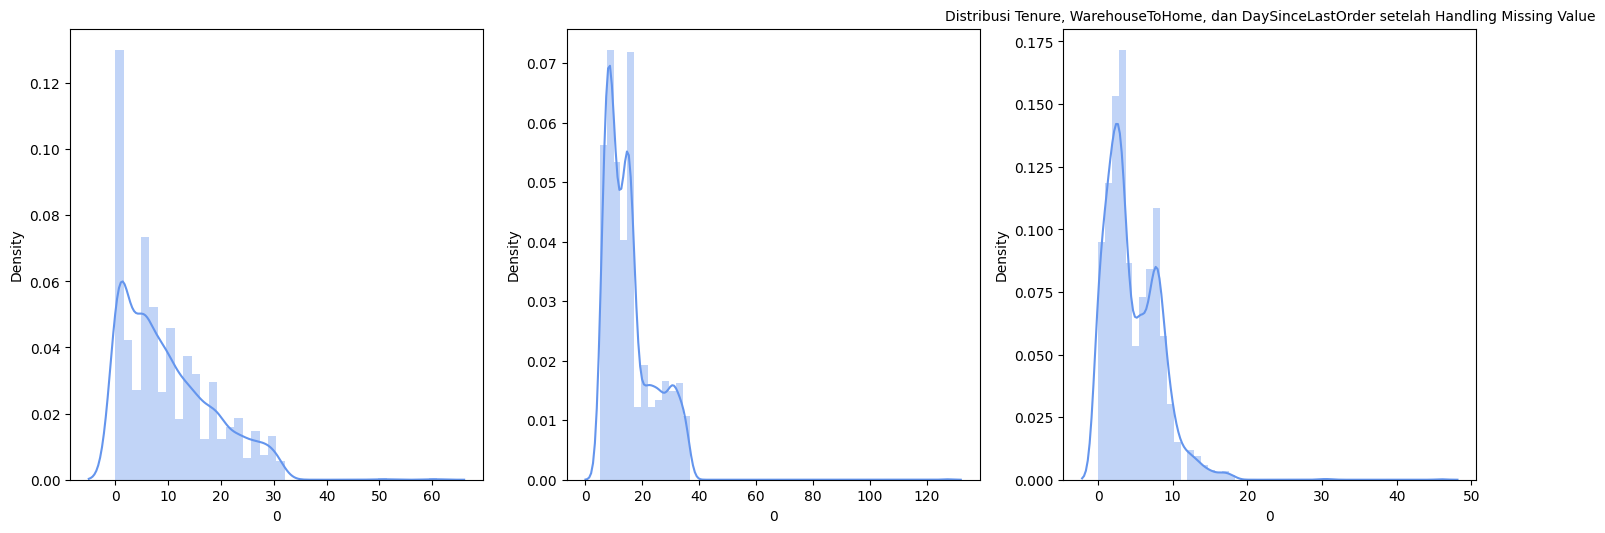

In [266]:
# Melihat distribusi masing-masing data setelah imputasi
imputer = IterativeImputer(random_state=0)
TenureAft = pd.DataFrame(imputer.fit_transform(df[['Tenure','CashbackAmount']]))
WarehouseToHomeAft = pd.DataFrame(imputer.fit_transform(df[['WarehouseToHome','CashbackAmount']]))
DaySinceLastOrderAft = pd.DataFrame(imputer.fit_transform(df[['DaySinceLastOrder','CashbackAmount']]))

ImputerDataFrame = [TenureAft,WarehouseToHomeAft, DaySinceLastOrderAft]
plt.figure(figsize=(15,15))
a=0
for i in ImputerDataFrame:
  plt.subplot(3, 3, a+1)
  sns.distplot(i[0], color='cornflowerblue')
  plt.tight_layout()
  a+=1
plt.title(f'Distribusi Tenure, WarehouseToHome, dan DaySinceLastOrder setelah Handling Missing Value', fontsize=10)

Distribusi data sebelum dan sesudah proses imputasi menunjukkan perbedaan yang sangat kecil. Penanganan *missing value* akan dilakukan pada tahap *data preprocessing*.

### Outlier
Beberapa model, seperti Logistic Regression dan K-Nearest Neighbour, memiliki sensitivitas terhadap keberadaan outlier. Oleh karena itu, diperlukan analisis lebih lanjut untuk mengidentifikasi outlier dalam dataset.

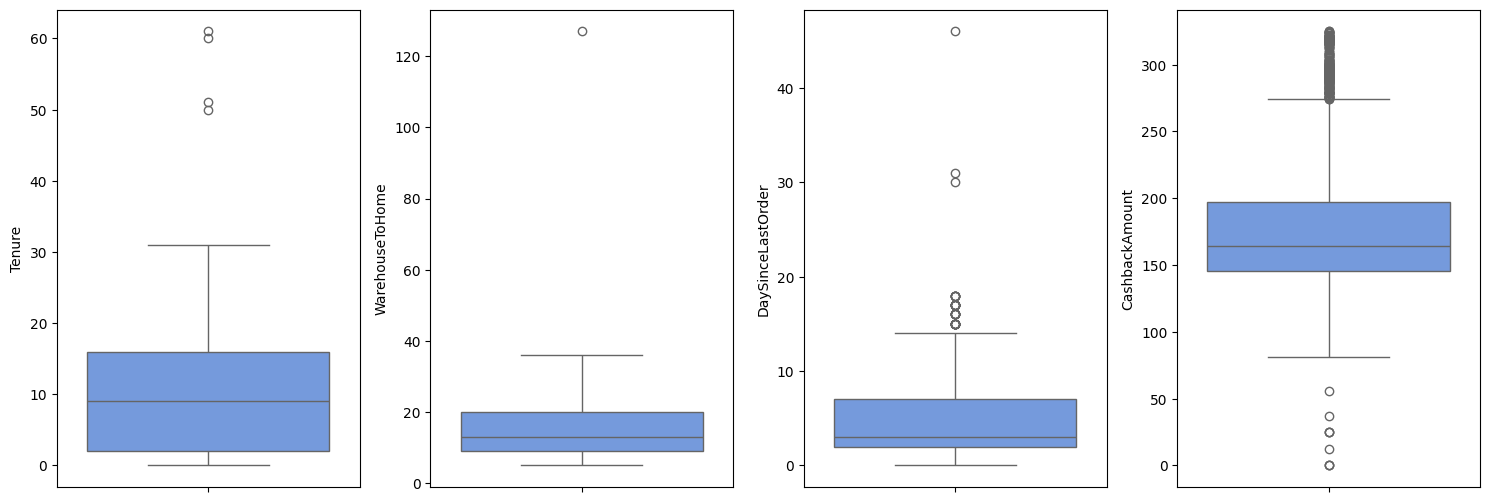

In [267]:
# Melihat outlier menggunakan boxplot pada data kontinu
features = ['Tenure','WarehouseToHome', 'DaySinceLastOrder','CashbackAmount']
plt.figure(figsize=(15,20))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y=df[features[i]], color='cornflowerblue', orient='v')
  plt.tight_layout()


In [268]:
# Melihat lower bound, upper bound, outlier, dan persentase outlier
for i in range(0, len(features)):
    Q1 = df[features[i]].quantile(0.25)
    Q3 = df[features[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound =  Q1 - (1.5 * IQR)
    upper_bound =  Q3 + (1.5 * IQR)
    condition = (df[features[i]]< lower_bound) | (df[features[i]]> upper_bound)
    outlier = df.loc[condition, features[i]].count()
    PersentaseOutlier = outlier/df[features[i]].count()*100
    print(f'''Lower Bound {features[i]} adalah {round(lower_bound,2)}, dan Upper Bound {features[i]} adalah {round(upper_bound,2)} , terdapat {outlier} data yang menyimpang dari data biasanya, yaitu sebanyak {round(PersentaseOutlier,2)}%''')
    '/n'

Lower Bound Tenure adalah -19.0, dan Upper Bound Tenure adalah 37.0 , terdapat 4 data yang menyimpang dari data biasanya, yaitu sebanyak 0.13%
Lower Bound WarehouseToHome adalah -7.5, dan Upper Bound WarehouseToHome adalah 36.5 , terdapat 1 data yang menyimpang dari data biasanya, yaitu sebanyak 0.03%
Lower Bound DaySinceLastOrder adalah -5.5, dan Upper Bound DaySinceLastOrder adalah 14.5 , terdapat 40 data yang menyimpang dari data biasanya, yaitu sebanyak 1.3%
Lower Bound CashbackAmount adalah 69.04, dan Upper Bound CashbackAmount adalah 274.0 , terdapat 253 data yang menyimpang dari data biasanya, yaitu sebanyak 7.74%


Berdasarkan hasil analisis, outlier pada kolom **Tenure** dan **WarehouseToHome** akan dihapus karena persentasenya relatif kecil. Sementara itu, outlier pada kolom **DaySinceLastOrder** dan **CashbackAmount** tidak akan dihapus, karena nilai tersebut masih dianggap wajar meskipun memiliki variansi yang tinggi. Pada tahap preprocessing, kolom **CashbackAmount** akan ditangani lebih lanjut dengan metode binning.

In [269]:
# Menghapus kolom dengan outlier
df.drop(df[df['Tenure']>37].index,inplace=True)
df.drop(df[df['WarehouseToHome']>36.5].index,inplace=True)

In [270]:
df.shape

(3264, 11)

## Data Analysis

Setelah menyelesaikan proses data cleaning, langkah berikutnya adalah menganalisis karakteristik pelanggan yang churn. Proporsi antara pelanggan yang churn dan yang tidak churn akan dihitung untuk memahami pola perilaku mereka.

#### Customer Churn

In [271]:
# Perbandingan pelanggan tidak churn dan churn
df['Churn'].value_counts()

Churn
0    2731
1     533
Name: count, dtype: int64

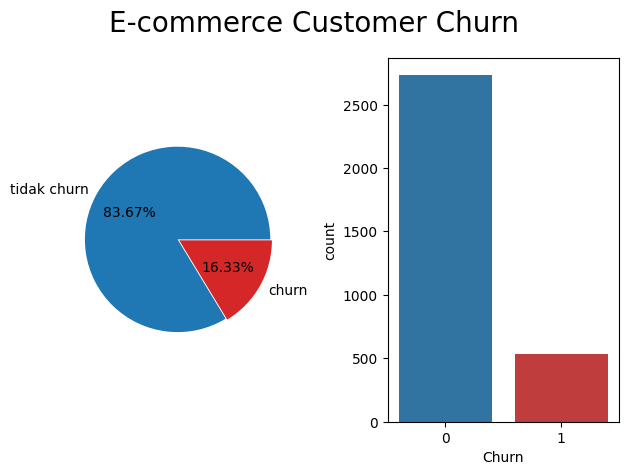

In [272]:
# Perbandingan pelanggan tidak churn dan churn
sns.color_palette('pastel')
plt.figure().suptitle('E-commerce Customer Churn', fontsize=20)
plt.subplot(1,2,1)
plt.pie(df['Churn'].value_counts(), labels=['tidak churn','churn'], colors= ['tab:blue','tab:red'],autopct='%.2f%%',explode=(0.01,0.01))
plt.subplot(1,2,2)
sns.countplot(data=df, x='Churn',palette=['tab:blue',"tab:red"])
sns.color_palette('pastel')
plt.tight_layout()
plt.show()  

Berdasarkan data yang ada, diketahui bahwa dataset memiliki distribusi kelas yang tidak seimbang (*imbalanced data*), dengan 83,67% pelanggan tidak churn dan 16,33% pelanggan churn. Ketidakseimbangan ini dapat menyebabkan model machine learning kesulitan dalam memprediksi kelas minoritas. Untuk mengatasi masalah ini, akan diterapkan metode *Synthetic Minority Oversampling Technique* (SMOTE) guna meningkatkan jumlah data pada kelas churn. Proses ini akan dilakukan saat tahap pemodelan.

Langkah berikutnya adalah menganalisis pengaruh setiap fitur terhadap customer churn untuk memahami faktor-faktor yang memengaruhi keputusan pelanggan.

#### Berdasarkan variabel numerik - kontinu

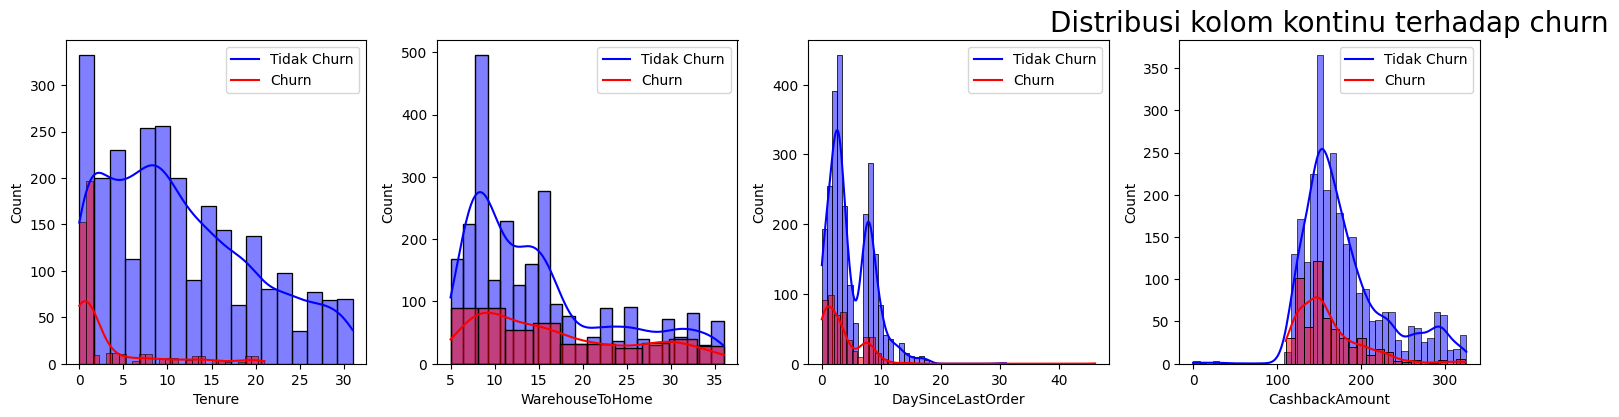

In [273]:
# Distribusi pada kolom kontinu terhadap churn
kontinu= ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']
a=1
sns.color_palette('pastel')
plt.figure(figsize=(15,15))
for i in kontinu:
    plt.subplot(4,4,a)
    sns.histplot(x=df[df['Churn']==0][i],kde=True,color='blue')
    sns.histplot(x=df[df['Churn']==1][i],kde=True,color='red')
    plt.legend(labels=['Tidak Churn','Churn'])
    plt.tight_layout()
    a+=1
plt.title('Distribusi kolom kontinu terhadap churn', fontsize=20)
plt.show()

Berdasarkan grafik distribusi variabel kontinu terhadap churn, berikut beberapa insight yang dapat diambil:

- **Tenure** menunjukkan durasi pelanggan menggunakan platform dalam hitungan bulan. Semakin pendek masa penggunaan, semakin tinggi kemungkinan pelanggan untuk churn. Pola menarik terlihat pada bulan ke-8 hingga ke-11, di mana jumlah pelanggan yang tetap setia (tidak churn) meningkat, mengindikasikan peningkatan loyalitas pada rentang waktu tersebut.
- **WarehouseToHome**, yang merepresentasikan jarak gudang ke rumah pelanggan, menunjukkan distribusi pelanggan churn yang cenderung merata. Namun, pada jarak di atas 20 km, selisih jumlah pelanggan churn dan tidak churn menjadi sangat kecil, sehingga jarak yang lebih jauh kemungkinan berkontribusi pada peningkatan risiko churn.
- **DaySinceLastOrder** memperlihatkan distribusi yang hampir serupa antara pelanggan churn dan tidak churn. Analisis lebih lanjut diperlukan untuk mengeksplorasi hubungan antara variabel ini dengan churn.
- **CashbackAmount** mengindikasikan bahwa pelanggan churn memiliki nilai cashback tertinggi di sekitar angka 150. Faktor ini akan diteliti lebih detail untuk memahami pola yang mendasarinya.

Selanjutnya, analisis rata-rata distribusi pelanggan churn akan dilakukan untuk setiap variabel guna mendapatkan pemahaman yang lebih mendalam.

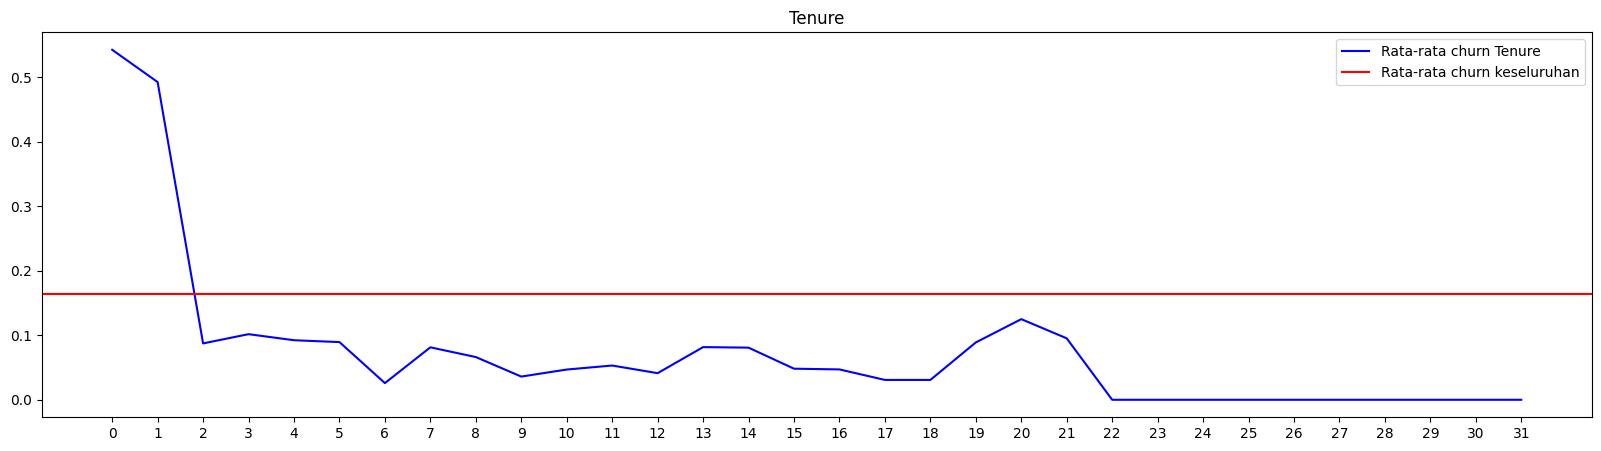

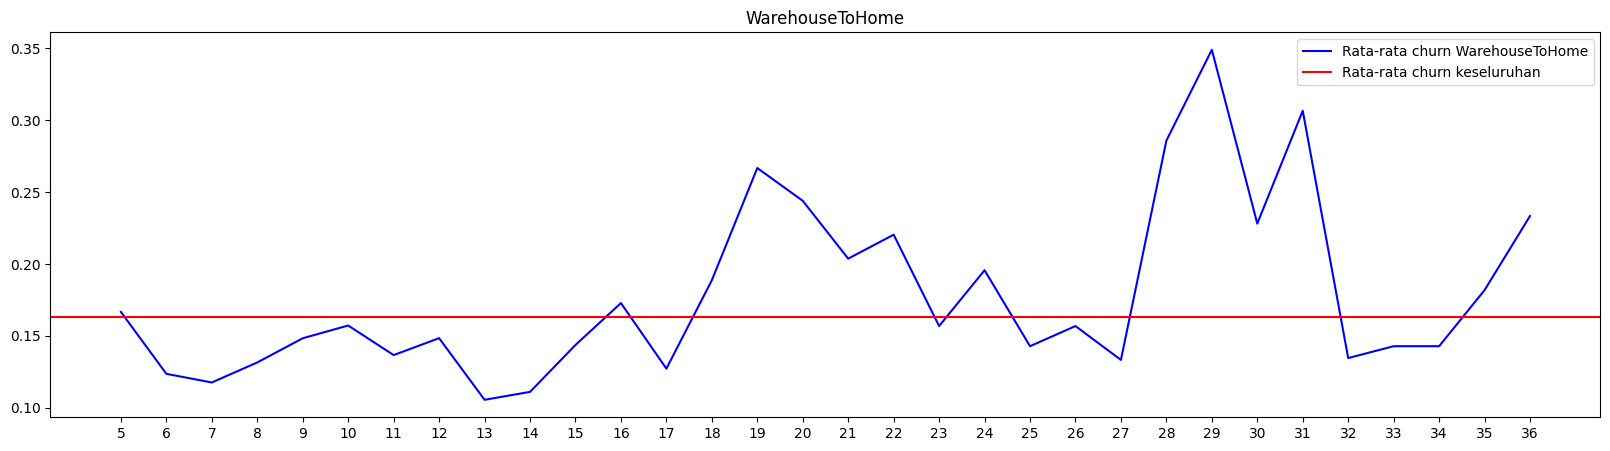

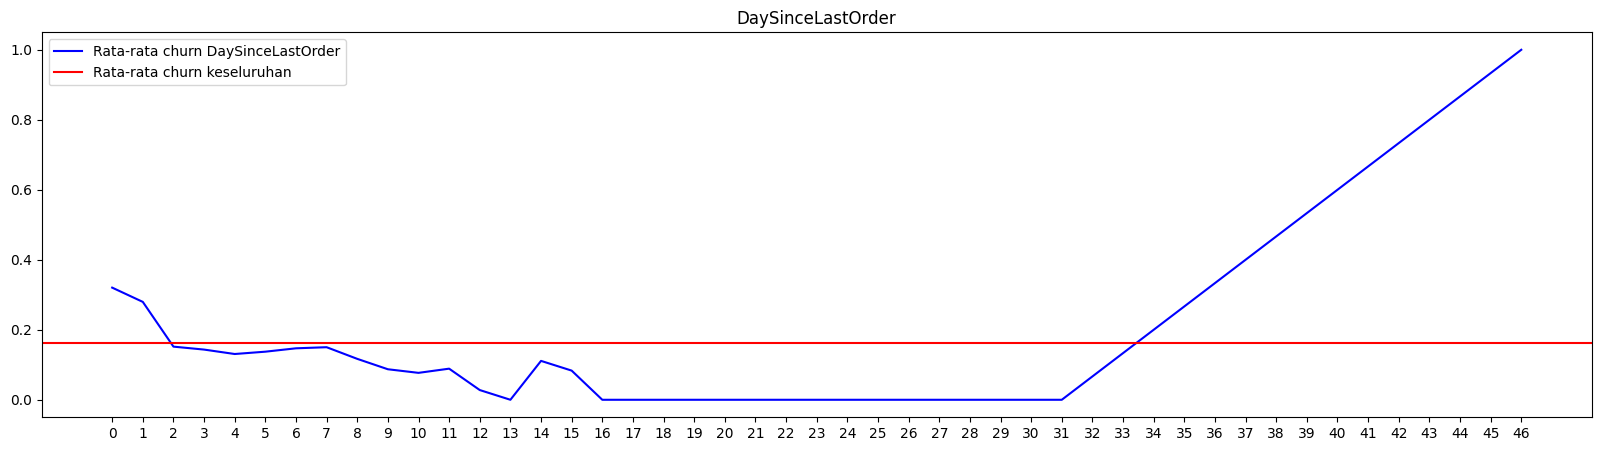

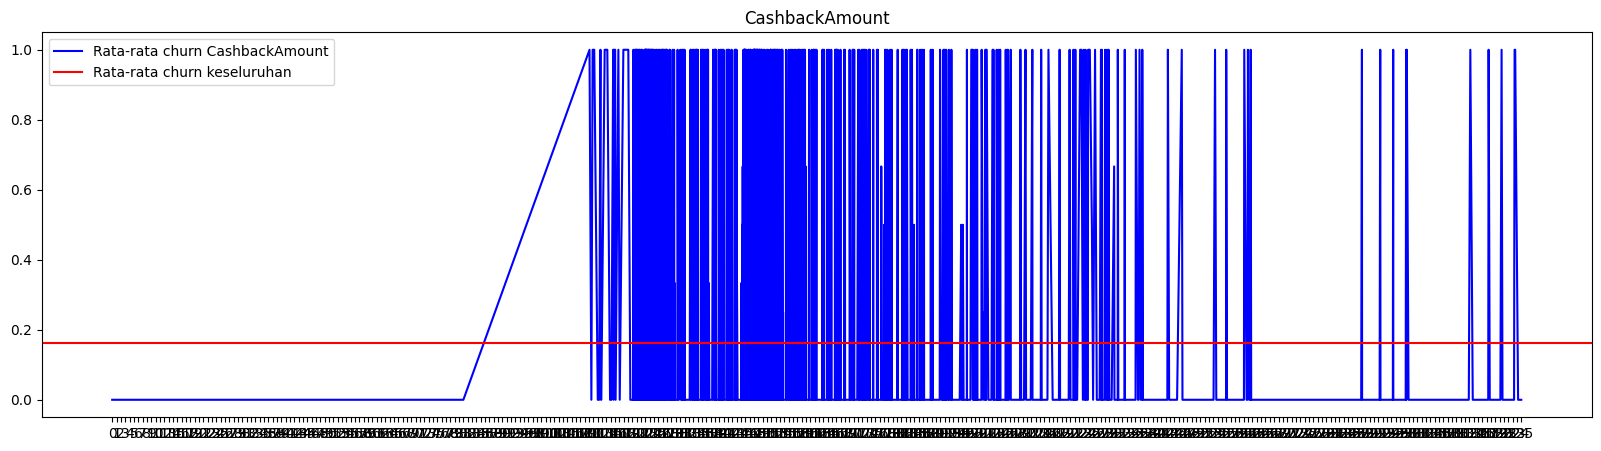

In [274]:
# Churn berdasarkan variabel
ChurnAvg = df[df['Churn']==1]['Churn'].sum()/df.shape[0]
for i in kontinu:
    plt.figure(figsize = (20,5))
    plt.plot(df.groupby(i)['Churn'].mean(), label=(f'Rata-rata churn {i}'),color='b')
    plt.axhline(y = ChurnAvg,label='Rata-rata churn keseluruhan', color='r')
    plt.xticks(np.arange(min(df[i]), max(df[i])+1, 1.0))
    plt.tight_layout
    plt.title(i)
    plt.legend()
    plt.show()


Dari hasil analisis, diperoleh beberapa poin berikut: 
* Pelanggan yang churn paling banyak berada pada masa penggunaan platform antara 0 hingga 2 bulan. Hal ini kemungkinan disebabkan oleh beberapa faktor, seperti: 
    * Pelanggan masih dalam tahap adaptasi dan merasa platform kurang sesuai.
    * Pelanggan menemukan platform e-commerce lain dengan penawaran yang lebih menarik.
    * Kurangnya variasi produk yang sesuai dengan kebutuhan pelanggan.
* Pelanggan dengan jarak antara gudang dan rumah di atas 17 km (asumsi dalam kilometer) menunjukkan tingkat churn yang lebih tinggi. Hal ini kemungkinan terkait dengan meningkatnya biaya pengiriman.
* Rata-rata **DaySinceLastOrder** cukup tinggi, yaitu lebih dari 31 hari. Namun, hal ini kemungkinan dipengaruhi oleh outlier karena data di atas 31 hari jumlahnya sedikit. Sebagian besar churn terjadi pada hari ke-0 hingga ke-2 setelah pembelian, yang dapat disebabkan oleh pelanggan hanya membeli produk yang spesifik sesuai kebutuhan tanpa ketertarikan lebih terhadap platform e-commerce itu sendiri.
* Rata-rata **CashbackAmount** sulit dianalisis karena tingginya variansi. Oleh karena itu, data akan dikelompokkan menggunakan metode binning pada tahap preprocessing untuk mempermudah analisis.

#### Berdasarkan variabel numerik Quantitatif diskrit dan numerik Qualitatif

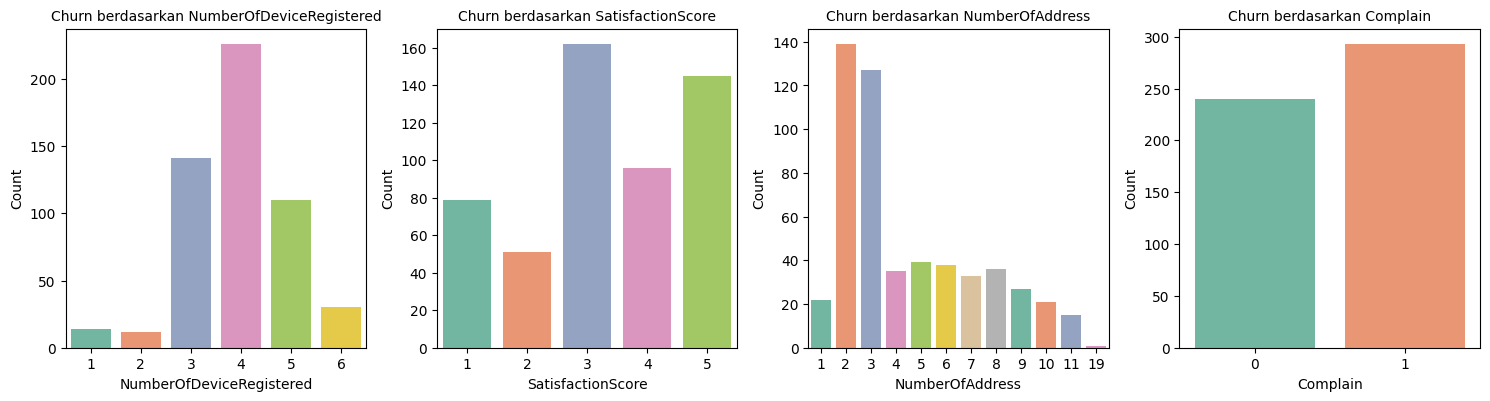

In [275]:
kolomnum = ['NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain']
a=1
plt.figure(figsize=(15,15))
for i in kolomnum:  
    plt.subplot(4,4,a)
    sns.countplot(x=df[df['Churn']==1][i],
                  palette="Set2")
    plt.title(f'Churn berdasarkan {i}', fontsize=10)
    plt.ylabel('Count')
    a+=1
    plt.tight_layout()
plt.show()

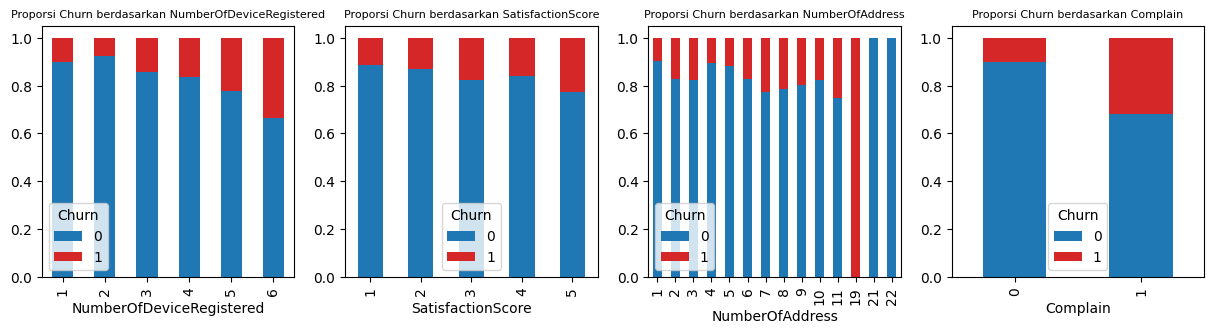

In [276]:
# Visualisasi proporsi churn berdasarkan variabel
a=1
plt.figure(figsize=(15,15))
for i in kolomnum: 
    ax = plt.subplot(4,4,a)
    plt.title(f'Proporsi Churn berdasarkan {i}', fontsize=8)
    pd.crosstab(df[i],df['Churn'],normalize='index').sort_index().plot(color=['tab:blue',"tab:red"], kind='bar', stacked=True,ax=ax)
    a+=1
    plt.tight_layout
plt.show()

<Axes: xlabel='SatisfactionScore'>

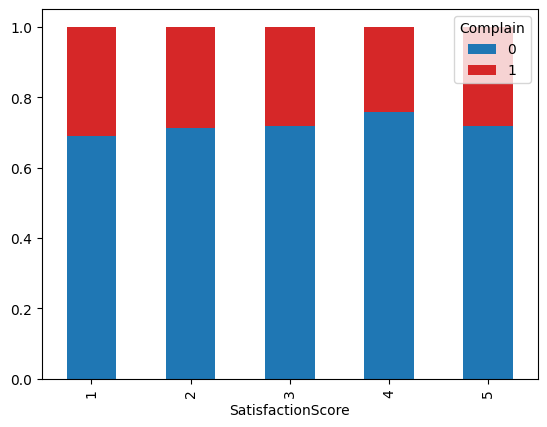

In [277]:
pd.crosstab(df['SatisfactionScore'],df['Complain'],normalize='index').sort_index().plot(color=['tab:blue',"tab:red"], kind='bar',stacked=True)

Dari analisis data, diperoleh beberapa temuan:

- Pelanggan yang churn paling sering memiliki 3-4 perangkat yang terhubung serta 2-3 alamat terdaftar. Namun, secara proporsi, tingkat churn tertinggi ditemukan pada pelanggan dengan 6 perangkat dan 7 alamat, dengan asumsi data outlier tidak diperhitungkan.
- Pelanggan churn dengan proporsi tertinggi memberikan skor kepuasan sebesar 5 dan cenderung mengajukan keluhan (complain). Hal ini dapat mengindikasikan bahwa meskipun pelanggan merasa puas dengan platform e-commerce secara keseluruhan, terdapat masalah terkait marketplace yang memengaruhi keputusan mereka untuk churn.

#### Berdasarkan variabel kategori 

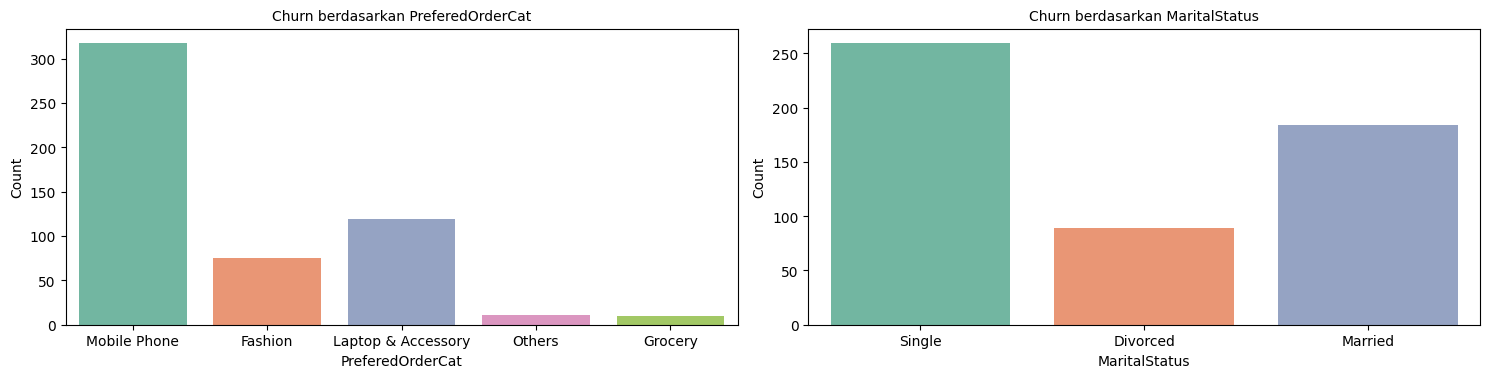

In [278]:
# Karakteristik churn berdasarkan kategori
kat = ['PreferedOrderCat', 'MaritalStatus']
plt.figure(figsize=(15,7))
a=1
for i in kat:  
    plt.subplot(2,2,a)
    sns.countplot(x=df[df['Churn']==1][i],
                  palette="Set2")
    plt.title(f'Churn berdasarkan {i}', fontsize=10)
    plt.ylabel('Count')
    a+=1
    plt.tight_layout()
plt.show()

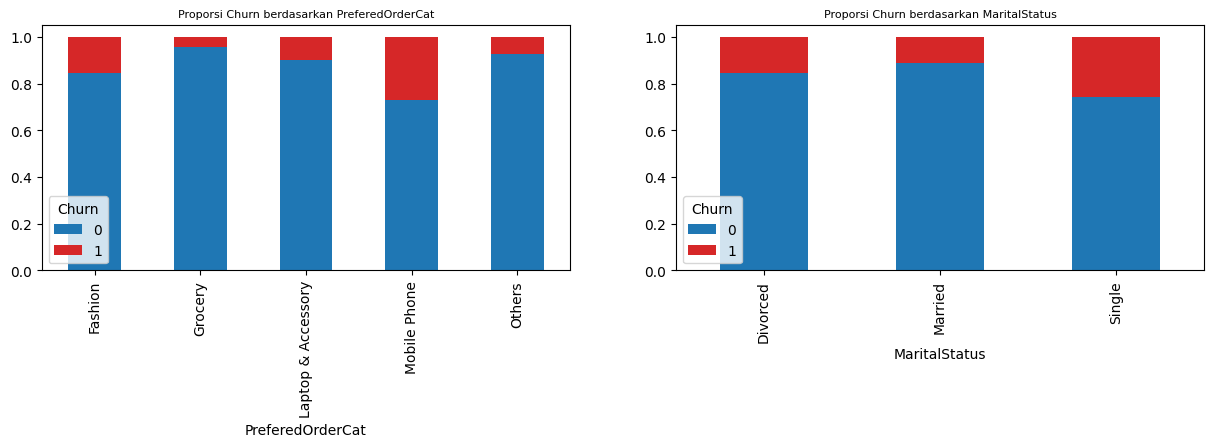

In [279]:
# Visualisasi proporsi churn berdasarkan variabel
a=1
plt.figure(figsize=(15,7))
for i in kat: 
    ax = plt.subplot(2,2,a)
    plt.title(f'Proporsi Churn berdasarkan {i}', fontsize=8)
    pd.crosstab(df[i],df['Churn'],normalize='index').sort_index().plot(color=['tab:blue',"tab:red"], kind='bar', stacked=True,ax=ax)
    a+=1
    plt.tight_layout
plt.show()

Berdasarkan data, terlihat bahwa baik jumlah maupun proporsi pelanggan yang churn cenderung memiliki preferensi pesanan pada kategori Mobile Phone dan berstatus single.

## Data Preprocessing and Feature engineering

In [280]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


Setelah melalui tahap data cleaning dan analisis data, langkah-langkah berikut akan dilakukan untuk preprocessing dan feature engineering:

- Kolom **CashbackAmount** yang memiliki variansi tinggi akan diubah menjadi kolom kategorik baru menggunakan metode binning.
- Penanganan missing value pada kolom **Tenure, WarehouseToHome, dan DaySinceLastOrder** akan dilakukan menggunakan Iterative Imputer, sesuai hasil analisis sebelumnya.
- Kolom **MaritalStatus** akan diencoding menggunakan metode One-Hot Encoding, karena hanya memiliki tiga kategori tanpa urutan tertentu.
- Untuk kolom **PreferedOrderCat**, Binary Encoding akan diterapkan karena memiliki lima kategori yang berbeda tanpa urutan khusus.
- Kolom **CashbackAmountClass** akan diproses dengan Ordinal Encoding, karena kategorinya memiliki urutan yang jelas, dari sangat kecil hingga sangat besar.

#### Binning

In [281]:
# Melakukan binning pada kategori cashbackamount
bin_labels= ['Sangat Kecil', 'Kecil', 'Sedang', 'Besar', 'Sangat Besar']
df['CashbackAmountClass']= pd.cut(df['CashbackAmount'], 5,labels = bin_labels)
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,CashbackAmountClass
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0,Sedang
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0,Kecil
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0,Sedang
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0,Besar
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0,Sangat Besar


In [282]:
df.groupby('CashbackAmountClass')['CashbackAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
CashbackAmountClass,,,,,,,,
Sangat Kecil,9.0,20.000000,19.118054,0.00,0.00,25.000,25.0000,56.00
Kecil,429.0,123.620047,4.686553,81.00,121.44,123.800,126.9500,129.96
Sedang,1985.0,160.183703,16.306101,130.22,147.75,157.020,172.6500,194.62
Besar,517.0,220.068221,17.275935,195.05,204.75,218.960,232.4800,259.99
Sangat Besar,324.0,290.180556,18.422611,260.03,273.99,291.895,300.7125,324.99


#### Data splitting

Langkah pertama adalah membagi dataset menggunakan metode train-test split untuk mengevaluasi performa model machine learning. Dataset dibagi menjadi 80% untuk data latih dan 20% untuk data uji, dengan parameter random_state=0 untuk memastikan reproduktibilitas. Selain itu, digunakan opsi stratify=y untuk memastikan proporsi target (churn) pada data latih dan data uji tetap seimbang.

In [283]:
# Membuat fitur x dan target y
x = df.drop(columns=['Churn'])
y = df['Churn']

In [284]:
# Melakukan data splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=0)

#### Handling missing value 

In [285]:
def imputation(x_train, x_test, cont_features):
    imputerCont = IterativeImputer(random_state=0, missing_values=np.nan)
    imputerCont.fit(x_train[cont_features])
    x_train[cont_features] = imputerCont.transform(x_train[cont_features])
    x_test[cont_features] = imputerCont.transform(x_test[cont_features])
    return x_train, x_test

Imputasi missing value dilakukan pada data latih dan data uji menggunakan fungsi yang telah dirancang sebelumnya.

In [286]:
# Fit&transform missing value imputation
x_train , x_test = imputation(x_train, x_test,kontinu)

In [287]:
# Melihat missing value
print(x_test.isna().sum(), x_test.isna().sum())

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
CashbackAmountClass         0
dtype: int64 Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
CashbackAmountClass         0
dtype: int64


Setelah memastikan bahwa tidak ada lagi missing value dalam data, langkah berikutnya adalah melakukan proses encoding.

#### Encoding

Transformer encoding dibuat sesuai dengan metode encoding yang telah dijelaskan sebelumnya. Setiap fitur akan diproses menggunakan teknik encoding yang sesuai, seperti One-Hot Encoding, Binary Encoding, atau Ordinal Encoding, berdasarkan karakteristik masing-masing fitur.

In [288]:
# Ordinal mapping kolom cashbackamountclass
ordinal_mapping = [
    {'col':'CashbackAmountClass',
    'mapping':{
        'Sangat Kecil' : 0,
        'Kecil': 1, 
        'Sedang': 2, 
        'Besar' : 3, 
        'Sangat Besar' : 4, 
    }}
]

In [289]:
# Transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['MaritalStatus']),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['CashbackAmountClass']),
    ('binary', ce.BinaryEncoder(), ['PreferedOrderCat'])
], remainder='passthrough') 

In [290]:
# Melihat preview hasil encoding 
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
testing

,onehot__MaritalStatus_Married,onehot__MaritalStatus_Single,ordinal__CashbackAmountClass,binary__PreferedOrderCat_0,binary__PreferedOrderCat_1,binary__PreferedOrderCat_2,remainder__Tenure,remainder__WarehouseToHome,remainder__NumberOfDeviceRegistered,remainder__SatisfactionScore,remainder__NumberOfAddress,remainder__Complain,remainder__DaySinceLastOrder,remainder__CashbackAmount
0,0.0,0.0,2.0,0.0,0.0,1.0,13.0,8.0,4.0,3.0,7.0,0.0,0.0,134.48
1,0.0,1.0,2.0,0.0,0.0,1.0,1.0,11.0,5.0,2.0,3.0,1.0,4.0,169.87
2,1.0,0.0,2.0,0.0,0.0,1.0,13.0,8.0,1.0,4.0,2.0,0.0,7.0,142.44
3,0.0,1.0,2.0,0.0,1.0,0.0,1.0,15.0,5.0,3.0,3.0,1.0,3.0,164.89
4,0.0,1.0,2.0,0.0,0.0,1.0,1.0,11.0,5.0,1.0,3.0,1.0,4.0,169.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2606,0.0,1.0,2.0,0.0,0.0,1.0,1.0,22.0,1.0,5.0,1.0,0.0,7.0,156.61
2607,0.0,1.0,2.0,0.0,0.0,1.0,17.0,6.0,4.0,3.0,5.0,0.0,2.0,159.85
2608,0.0,1.0,2.0,0.0,1.0,0.0,7.0,15.0,5.0,1.0,2.0,0.0,3.0,148.42
2609,0.0,1.0,2.0,0.0,0.0,1.0,12.0,34.0,4.0,5.0,4.0,0.0,3.0,142.84


## Modeling

Beberapa metode klasifikasi akan digunakan untuk pengujian dalam menentukan model terbaik untuk dataset ini, yaitu Logistic Regression, K-Nearest Neighbour, Decision Tree, Random Forest, dan XGBoost.

In [291]:
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
xgb = XGBClassifier()

#### Model Benchmarking: SMOTE & Stratified K-Fold

Beberapa hal yang diperhatikan dalam proses benchmarking model ini meliputi:

- Karena dataset memiliki distribusi kelas yang tidak seimbang (imbalanced data), dilakukan resampling menggunakan metode SMOTE untuk menambah data pada kelas minoritas.
- Proses validasi menggunakan stratified K-Fold untuk memastikan distribusi kelas target (churn) tetap terjaga selama data splitting pada cross-validation.
- Metrik evaluasi yang digunakan adalah ROC-AUC, karena metrik ini dapat mengevaluasi probabilitas model serta menganggap kedua kelas memiliki tingkat kepentingan yang setara.
- Hyperparameter model disetel ke nilai default, dan semua fitur dalam dataset digunakan untuk pelatihan model.

In [292]:
models = [logreg,knn,dt,rf,xgb]
score=[]
rata=[]
std=[]

for i in models:
    smote_ = SMOTE(random_state=0)
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('resampling', smote_),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

,mean roc_auc,sdev
model,,
XGBoost,0.938095,0.006777
Random Forest,0.929934,0.005728
Logistic Regression,0.864139,0.012254
KNN,0.797644,0.019514
Decision Tree,0.769141,0.014879


Berdasarkan hasil di atas, model terbaik dengan pengaturan hyperparameter default adalah XGBoost dan Random Forest, dengan rata-rata nilai ROC-AUC masing-masing sebesar 0.935 dan 0.929. Kedua model menunjukkan performa yang cukup baik, sehingga akan dilakukan implementasi dan evaluasi lebih lanjut pada data uji (test data).

#### Model Benchmarking: Test Data

Langkah berikutnya adalah mengimplementasikan model pada data uji (test data) untuk mengevaluasi performa model secara keseluruhan. Implementasi dilakukan dengan menggunakan model terbaik berdasarkan hasil evaluasi sebelumnya. Berikut adalah prosesnya:

In [293]:
models = [logreg,knn,dt,rf,xgb]
score_roc_auc = []

def y_pred_func(i):
    smote_ = SMOTE(random_state=0)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('resampling', smote_),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.97      0.74      0.84       546
           1       0.40      0.88      0.55       107

    accuracy                           0.76       653
   macro avg       0.68      0.81      0.69       653
weighted avg       0.88      0.76      0.79       653

KNN 
               precision    recall  f1-score   support

           0       0.94      0.78      0.85       546
           1       0.40      0.76      0.52       107

    accuracy                           0.77       653
   macro avg       0.67      0.77      0.69       653
weighted avg       0.85      0.77      0.80       653

Decision Tree 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       546
           1       0.57      0.69      0.62       107

    accuracy                           0.86       653
   macro avg       0.75      0.79      0.77       653
weighted avg       0.88      0

,roc_auc score
model,
Random Forest,0.953100
XGBoost,0.946407
Logistic Regression,0.913491
KNN,0.831476
Decision Tree,0.794512


Berdasarkan hasil di atas, model XGBoost dan Random Forest memiliki nilai ROC-AUC tertinggi, yaitu masing-masing 0.955 dan 0.953. Oleh karena itu, langkah selanjutnya adalah meningkatkan performa kedua model dengan melakukan hyperparameter tuning dan kemudian membandingkan hasilnya.

### Hyperparameter Tuning

Hyperparameter tuning adalah langkah penting untuk mengatur perilaku dan kinerja keseluruhan model machine learning. Pada tahap ini, tuning akan dilakukan pada model Random Forest dan XGBoost dengan tujuan meningkatkan performa model. Parameter yang akan dioptimalkan meliputi:

- Random Forest:
n_estimators (default: 100)
max_depth (default: None)
max_leaf_nodes (default: 1)
max_features (default: 2)
XGBoost:

- learning_rate (default: 0.3)
max_depth (default: 6)
n_estimators (default: 100)
subsample (default: 1)

Melalui tuning ini, diharapkan performa model menjadi lebih optimal dan mampu menghasilkan prediksi yang lebih akurat.

In [294]:
smote_ = SMOTE(random_state=0)
xgb = XGBClassifier(random_state=0)
Pipe_rf = Pipeline([('preprocess', transformer),('resampling', smote_), ('model_rf', rf)]) 
Pipe_xgb = Pipeline([('preprocess', transformer),('resampling', smote_), ('model_xgb', xgb)])
skfold=StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

# RandomForest Hyperparameter Tuning
hyperparam_rf = [{
              'model_rf__n_estimators':[200, 220], 
              'model_rf__max_depth':[13,17],
              'model_rf__min_samples_split':[2, 3],
              'model_rf__min_samples_leaf':[2, 3]
             }]

rf_grid = GridSearchCV(estimator = Pipe_rf,
                      param_grid = hyperparam_rf, 
                      cv = skfold, 
                      scoring = 'roc_auc',
                      error_score='raise',
                      verbose = 2)
rf_grid.fit(x_train,y_train)

# XGBoost Hyperparameter Tuning
hyperparam_xgb = [{
              'model_xgb__n_estimators':[190, 200],
              'model_xgb__subsample':[0.8,1],
              'model_xgb__max_depth':[17, 19],
              'model_xgb__learning_rate':[ 0.3,0.08],
              'model_xgb__random_state':[0]}]

xgb_grid = GridSearchCV(estimator = Pipe_xgb,
                      param_grid = hyperparam_xgb, 
                      cv = skfold, 
                      scoring = 'roc_auc', 
                      error_score='raise',
                      verbose = 2)
xgb_grid.fit(x_train,y_train)            


Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   0.6s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   0.6s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   0.6s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   0.6s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   0.6s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   0.6s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['MaritalStatus']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'CashbackAmountClass',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping': Sangat K...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=0, ...))]),
             param_grid=[{'model_xgb__learning_rate': [0.3, 0.08],
                          'model_xgb__max_depth': [17, 19],
                          'model_xgb__n_estimators': [190, 200],
                          'model_xgb__random_state': [0],
                          'model_xgb__subsample': [0.8, 1]}],
             scoring='roc_auc', verbose=2)

In [295]:
# Random Forest
print('Random Forest Hyperparameter')
print(rf_grid.best_score_)
print(rf_grid.best_params_)
# XGBoost 
print('XGBoost Hyperparameter')
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)    

Random Forest Hyperparameter
0.9302680850137968
{'model_rf__max_depth': 17, 'model_rf__min_samples_leaf': 2, 'model_rf__min_samples_split': 2, 'model_rf__n_estimators': 200}
XGBoost Hyperparameter
0.9436286728596995
{'model_xgb__learning_rate': 0.08, 'model_xgb__max_depth': 19, 'model_xgb__n_estimators': 200, 'model_xgb__random_state': 0, 'model_xgb__subsample': 0.8}


Proses hyperparameter tuning dilakukan dengan membandingkan performa model menggunakan nilai default dan parameter yang dituning secara iteratif, dibantu dengan metode grid search. Setelah beberapa percobaan tuning, parameter terbaik yang diperoleh adalah sebagai berikut:

- Random Forest:
ROC-AUC tertinggi: 0.930
Parameter optimal: max_depth=17, min_samples_leaf=2, min_samples_split=2 (default), dan n_estimators=200.

- XGBoost:
ROC-AUC tertinggi: 0.945
Parameter optimal: learning_rate=0.08, max_depth=19, n_estimators=190, dan subsample=1.

Hasil menunjukkan bahwa XGBoost memiliki performa yang lebih baik dengan ROC-AUC sebesar 0.945 dibandingkan Random Forest. Oleh karena itu, fokus analisis selanjutnya akan menggunakan model XGBoost.

In [296]:
# Model XGBoost Tuned
best_model = xgb_grid.best_estimator_
best_model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'CashbackAmountClass',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Sangat Kecil    0
Kecil           1
Sedang          2
Besar           3
Sangat Besar    4
dtype: int64}]),
                                                  ['CashbackAmountClass']),
                                                 ('binary', BinaryEncoder(),
                                                  [...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.08,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=19, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=0, ...))])

In [297]:
# Model XGBoost Default
xgb = XGBClassifier()
estimator=Pipeline([
    ('preprocess',transformer),
    ('resampling',smote_),
    ('model',xgb)
])
estimator.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'CashbackAmountClass',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Sangat Kecil    0
Kecil           1
Sedang          2
Besar           3
Sangat Besar    4
dtype: int64}]),
                                                  ['CashbackAmountClass']),
                                                 ('binary', BinaryEncoder(),
                                                  [...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [298]:
# Melihat perbandingan model dengan default dan hyperparameter tuning
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default xgb : ', roc_auc_default)
print('ROC AUC Score Tuned xgb : ', roc_auc_tuned)

ROC AUC Score Default xgb :  0.946407175379138
ROC AUC Score Tuned xgb :  0.9522611345041252


In [299]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default XGBoost : \n', report_default)
print('Classification Report Tuned XGBoost : \n', report_tuned)

Classification Report Default XGBoost : 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       546
           1       0.81      0.70      0.75       107

    accuracy                           0.92       653
   macro avg       0.87      0.83      0.85       653
weighted avg       0.92      0.92      0.92       653

Classification Report Tuned XGBoost : 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       546
           1       0.76      0.69      0.72       107

    accuracy                           0.91       653
   macro avg       0.85      0.82      0.84       653
weighted avg       0.91      0.91      0.91       653



Berdasarkan hasil analisis data di atas, diperoleh beberapa temuan penting:

- Dari proses hyperparameter tuning, terlihat bahwa selisih antara nilai ROC-AUC pada model XGBoost dengan parameter default dan yang telah dituning tidak terlalu besar, yaitu hanya 0.02. Nilai ROC-AUC terbaik setelah tuning adalah 0.95.
- Proses tuning menunjukkan bahwa nilai yang diperoleh cukup baik dibandingkan dengan parameter default. Analisis lebih lanjut dapat difokuskan pada pemilihan parameter berdasarkan referensi nilai yang lebih optimal dan eksplorasi hyperparameter lainnya.
- Model dengan hyperparameter tuning dipilih untuk digunakan, dengan hasil metrik sebagai berikut:
Kelas positif: Recall sebesar 0.70, Precision 0.74, dan F1 Score 0.72.
Kelas negatif: Recall sebesar 0.95, Precision 0.94, dan F1 Score 0.95.
- Langkah analisis selanjutnya yang dapat dilakukan adalah meningkatkan nilai recall pada kelas positif dengan mengoptimalkan threshold berdasarkan ROC-AUC.

In [300]:
# Model Akhir
best_model = xgb_grid.best_estimator_
Churn_model = best_model.fit(x_train, y_train)

### Feature Importances

Langkah berikutnya adalah menganalisis fitur-fitur yang paling berpengaruh terhadap potensi pelanggan churn. Hal ini dilakukan untuk memahami faktor utama yang berkontribusi pada keputusan pelanggan untuk churn, sehingga dapat digunakan sebagai dasar untuk strategi bisnis yang lebih efektif.

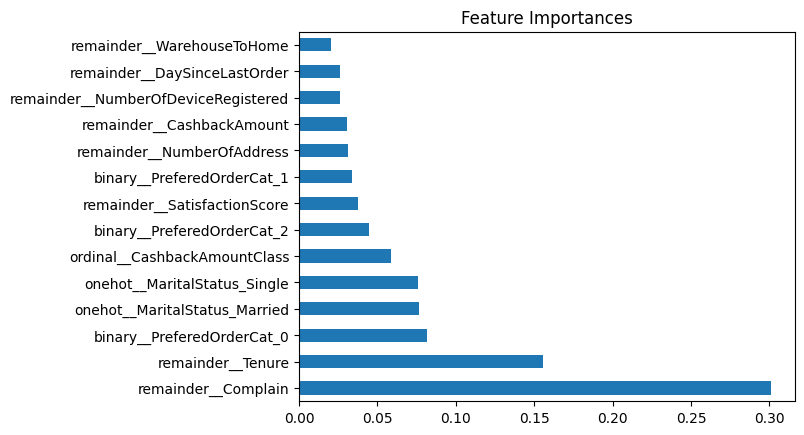

In [301]:
coef1 = pd.Series(best_model[2].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Berdasarkan analisis, dapat dilihat bahwa faktor utama yang memengaruhi potensi pelanggan churn serta model machine learning adalah complain, diikuti oleh masa tenure pelanggan, dan kategori produk yang disukai pelanggan bulan lalu. Untuk meningkatkan akurasi sekaligus mengurangi kompleksitas model, dapat dilakukan feature selection atau kombinasi fitur-fitur yang memiliki pengaruh besar, lalu hasilnya dibandingkan dengan model terbaik saat ini.

Selain itu, faktor-faktor tersebut juga memberikan wawasan berharga bagi bisnis. Perusahaan perlu memperhatikan dan menindaklanjuti feedback dari pelanggan yang mengajukan complain, baik terkait platform e-commerce maupun marketplace yang terdaftar. Di sisi lain, perusahaan dapat meningkatkan retensi pelanggan dengan menawarkan promo-promo berkelanjutan, misalnya melalui program berlangganan (subscription) untuk menjaga loyalitas pelanggan.


### Model Akhir


Export model terbaik dengan pickle format sav

In [302]:
# Export model
best_model = xgb_grid.best_estimator_
Churn_model = best_model.fit(x_train, y_train)
pickle.dump(Churn_model, open('Model_final.sav', 'wb'))

Dalam penerapan model, terdapat beberapa langkah penting yang perlu diperhatikan sebelum menggunakan model, yaitu memastikan data telah melalui proses berikut:

- Menghapus data yang duplikat.
- Menghilangkan outlier pada kolom Tenure dan WarehouseToHome dengan persentase kurang dari 1%.
- Melakukan binning pada kolom CashbackAmount untuk mengelompokkan nilainya.
- Menangani missing value sesuai metode yang telah ditentukan.
Menggunakan model untuk memprediksi apakah pelanggan berpotensi churn atau tidak.

In [303]:
# Functions
def duplikat(data):
    data.drop_duplicates(inplace=True)

def outlier(data,features):
    for i in range(0, len(features)):
        Q1 = data[features[i]].quantile(0.25)
        Q3 = data[features[i]].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound =  Q1 - (1.5 * IQR)
        upper_bound =  Q3 + (1.5 * IQR)
        condition = (data[features[i]]< lower_bound) | (data[features[i]]> upper_bound)
        outlier = data.loc[condition, features[i]].count()
        PersentaseOutlier = outlier/data[features[i]].count()*100
        if PersentaseOutlier <= 1:
            data.drop(data[data[features]>upper_bound].index,inplace=True)

def binning(data,kolomcashback):
    bin_labels= ['Sangat Kecil', 'Kecil', 'Sedang', 'Besar', 'Sangat Besar']
    data['CashbackAmountClass']= pd.cut(data['kolomcashback'], 5,labels = bin_labels)

def imputation(data, cont_features):
    imputerCont = IterativeImputer(random_state=0, missing_values=np.nan)
    imputerCont.fit(data[cont_features])
    data[cont_features] = imputerCont.transform(data[cont_features])
    return data

def pred(data):
    Churn = pickle.load(open('Model_final.sav', 'rb'))
    Churn_pred = Churn.predict(data.drop(columns='Churn'))
    data['Churn_pred'] = Churn_pred
    return data.head()

## Conclusion and Recommendation

### Kesimpulan

In [304]:
print('Classification Report Tuned XGBoost : \n', report_tuned)

Classification Report Tuned XGBoost : 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       546
           1       0.76      0.69      0.72       107

    accuracy                           0.91       653
   macro avg       0.85      0.82      0.84       653
weighted avg       0.91      0.91      0.91       653



Dari hasil analisis, dapat disimpulkan bahwa model prediksi yang dibuat mampu mengidentifikasi 95% pelanggan yang tidak churn dan 70% pelanggan yang churn, berdasarkan nilai recall. Selain itu, model memiliki tingkat akurasi sebesar 74% dalam memprediksi pelanggan yang akan churn. Namun, masih ada sekitar 4% pelanggan yang churn tetapi diprediksi tidak churn.

Jika mempertimbangkan biaya untuk mempertahankan pelanggan sebesar $10 dan biaya mendapatkan pelanggan baru sebesar $40, serta total 3264 pelanggan (533 pelanggan churn dan 2731 pelanggan tidak churn), perhitungan biaya dapat dirangkum sebagai berikut:

**Tanpa Model** (Menargetkan semua pelanggan):
- Total Biaya: $32,640 (3264 pelanggan x $10)
- Pelanggan churn yang ditemukan: 533 orang
- Pelanggan tidak churn yang ditemukan: 2731 orang
- Biaya terbuang: $27,310 (2731 pelanggan tidak churn x $10)

**Dengan Model** (Menargetkan berdasarkan prediksi):
- Total Biaya: $3,731 (70% dari 533 pelanggan churn x $10)
- Pelanggan churn yang ditemukan: 374 orang (70% dari 533)
- Pelanggan churn yang tidak ditemukan: 268 orang (159 orang churn tidak ditemukan + 4% dari 2731 pelanggan tidak churn)
- Pelanggan tidak churn yang ditemukan: 2595 orang (95% dari 2731)
- Pelanggan tidak churn yang tidak ditemukan: 136 orang
- Biaya terbuang: $12,080 (136 x $10 + 268 x $40)
- Penghematan: $15,230 ($27,310 - $12,080)

Dengan menggunakan model prediksi, perusahaan dapat mengurangi biaya pemasaran secara signifikan dengan lebih fokus pada pelanggan yang benar-benar berpotensi churn.

Selain itu, analisis menunjukkan bahwa faktor utama yang memengaruhi churn adalah complain dan masa tenure pelanggan. Perusahaan perlu lebih memperhatikan pelanggan yang mengajukan complain dan mereka yang memiliki masa tenure rendah, karena keduanya berpotensi tinggi untuk churn.

### Rekomendasi

Berikut adalah beberapa rekomendasi yang dapat diberikan terkait sisi bisnis dan model:

**Sisi Bisnis** :
- Menawarkan promo, cashback, atau program langganan (subscription) kepada pelanggan dengan masa tenure 0-2 bulan yang berpotensi churn, untuk meningkatkan ketertarikan mereka dalam terus menggunakan platform e-commerce.
- Memperhatikan keluhan (complain) pelanggan dengan meningkatkan pengalaman pengguna melalui:
  - Menyediakan lebih banyak variasi produk dengan menjalin kerja sama dengan mitra baru.
  - Mengoptimalkan fitur live chat antara pelanggan dan pembeli, serta antara pelanggan dan pusat bantuan.
  - Memberikan pelatihan kepada marketplace yang terdaftar untuk meningkatkan kualitas layanan dan produk yang ditawarkan.
- Menawarkan potongan biaya pengiriman kepada pelanggan yang berpotensi churn dan tinggal jauh dari gudang (warehouse).
- Memanfaatkan model machine learning yang telah dikembangkan untuk merancang strategi pemasaran yang lebih efektif dan tepat sasaran.

**Sisi Model**:
- Pastikan data yang ditarik memiliki kolom Customer ID untuk menghindari duplikasi data serta memvalidasi bahwa dataset bebas dari missing value.
- Tambahkan fitur baru yang relevan dengan layanan e-commerce dan transaksi pelanggan, seperti:
  - Durasi pengiriman produk.
  - Ketepatan waktu pengiriman.
  - Efektivitas layanan pelanggan (contoh: apakah layanan pelanggan membantu atau tidak).
-  Tingkatkan performa model dengan melakukan tuning hyperparameter menggunakan nilai awal sebagai referensi, atau mencoba parameter baru.
- Optimalkan nilai recall pada kelas churn dengan melakukan tuning threshold ROC-AUC.
- Lakukan seleksi fitur berdasarkan tingkat kepentingannya (feature importance), dan coba kombinasi fitur yang berpengaruh untuk mengurangi kompleksitas model tanpa mengorbankan akurasi.

Rekomendasi ini dapat membantu perusahaan e-commerce meningkatkan retensi pelanggan sekaligus mengoptimalkan model yang digunakan untuk pengambilan keputusan.